# Project IART Class - COVID-19 mobility reports - Part 1
## Machine Learning Analysis - Regression problems
#### Authors:

 * Maria de Fátima Barros   up201608444
 * Miguel Roque Ferreira    up201606158

## Abstract

Covid-19 is the name for the new coronavirus disease. The outbreak was declared a public health emergency of international concern in the end of January 2020. There are several entities, such as the World Health Organization (WHO), that are working 24/7 to analyse related data. In this work, we will use Kaggle Dataset of Covid-19 mobility reports to predict a number of total cases and fatalities of covid-19 in different countries throughout a time series. To do so, several problematics were defined in order to analyse the best approach for treating the dataset and take advantage of the information in it amongst with extra information from other sources. Given that, the best results were obtained for the prediction of the total number of cases by using the information of the overall growth trend of the total number of cases of the previous days with a gap of one week. The model used was Random Forest Regression and the scaled results obtained were R^2 = 0.974350±0.032675 and MSE=0.000950±0.001201 for the train set and R^2=0.900075±0.070783 and MSE=0.005150±0.003009 for the test set. Concerning the fatalities predictions, the regressor algorithm was the same and the scaled results in the train set were of R^2=0.997000±0.000883 and MSE=0.0001 and for the test set R^2=0.961875±0.003994 and MSE=0.001925±0.000435.


## Introduction

The coronavirus disease 2019 (COVID-19) pandemic represents a global public health emergency and until April 2020 the total global deaths have surpassed 100.000 wiht a total of 1.690.000 diagnostic of confirmed cases. 

In this project, one of the goals is to explore the dataset provided by Kaggle: Covid-19 mobility reports in order to understand how this type of data structures can be analysed through Python Machine Learning libraries, such as Scikit Learn. This dataset contains a temporal analysis of some features that can be related to Covid-19 cases and fatalities, being this, one of the major challenges of working with this data. 

We defined several problems to test different approaches and evaluate which one of them could model the best our data. For some of them, some information from other sources was added. 


Ref: https://www.who.int/emergencies/diseases/novel-coronavirus-2019

## Description & Exploration of the Dataset
The following steps are based in the notebook used in IART classes for Machine Learning problems: https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb.

In [1]:
#Main imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
import sys
import os

### Explore the data
Let's start by creating some directory variables:

In [2]:
code_path=os.getcwd()
data_path=code_path.replace('code','data')
print("Code path : ",code_path)
print("Data path : ",data_path)

Code path :  /home/fatimab/IART_classes/COVID-19/code
Data path :  /home/fatimab/IART_classes/COVID-19/data


Now let's read data.csv from the data_path:

In [3]:
os.chdir(data_path)
covid_data=pd.read_csv("data.csv",na_values=["NA"])
os.chdir(code_path)
covid_data.head()

iso    country        date  grocery_pharmacy   parks  residential  \
0  AR  Argentina  2020-02-23             8.185  17.563        0.437   
1  AR  Argentina  2020-02-24           -15.875  25.605        6.321   
2  AR  Argentina  2020-02-25           -17.135   1.325        6.895   
3  AR  Argentina  2020-02-26             2.304   5.399       -2.273   
4  AR  Argentina  2020-02-27            -0.404  -5.267       -0.493   

   retail_recreation  transit_stations  workplaces  total_cases  fatalities  
0             13.644             5.334      -2.486            0           0  
1             -9.973           -26.785     -53.687            0           0  
2            -19.717           -28.485     -50.053            0           0  
3              0.845             9.461      12.584            0           0  
4             -0.584             7.983      12.407            0           0

Print out summary statistics about the data set:

In [4]:
covid_data.describe()

grocery_pharmacy       parks  residential  retail_recreation  \
count        817.000000  817.000000   817.000000         817.000000   
mean          -8.229424  -13.394035     9.545845         -26.205257   
std           21.313369   32.891636    10.545377          30.992728   
min          -84.798000  -91.456000    -3.647000         -95.158000   
25%          -16.578000  -32.841000     0.744000         -49.975000   
50%            0.088000   -6.498000     5.912000         -14.427000   
75%            4.838000    6.961000    16.695000          -0.632000   
max           59.474000   75.002000    40.343000          19.699000   

       transit_stations  workplaces    total_cases    fatalities  
count        817.000000  817.000000     817.000000    817.000000  
mean         -28.370122  -19.126192   10699.773562    566.007344  
std           30.211025   25.983021   31656.464952   2008.520488  
min          -88.956000  -79.293000       0.000000      0.000000  
25%          -54.145000  -40.582000      27.000000      0.000000  
50%          -19.502000   -8.395000     648.000000      6.000000  
75%           -0.970000    1.037000    4585.000000     79.000000  
max           16.822000   21.347000  336912.000000  15887.000000

As we can see from above, this data may need some normalization or standardization. The min max values from the features have a wide range and differ a lot between features, which can lead to having some features that weight more than others in our models. In a first approach, we want to take all the features in the same consideration.


Here's some important data about the dataset provided by https://www.kaggle.com/gustavomodelli/covid-community-measures:


Description of community measures: (% Change)

 * Retail & recreation: Mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.

 * Grocery & pharmacy: Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.

 * Parks: Mobility trends for places like national parks, public beaches, marinas, dog parks, plazas, and public gardens.

 * Transit stations: Mobility trends for places like public transport hubs such as subway, bus, and train stations.

 * Workplaces: Mobility trends for places of work.

 * Residential: Mobility trends for places of residence.
 
 Notice that they say data is in % Change, meaning that the actual values in the file are normalized by the following:
 
 
 <center>Percent Change = (New Number-Original Number) / Original Number

Let's also see how many samples the dataset has:

In [5]:
print(covid_data.shape)
print("Number of samples : ", covid_data.shape[0])
print("Number of features & labels : ", covid_data.shape[1])

(817, 11)
Number of samples :  817
Number of features & labels :  11


This means we have 817 rows - samples - and 11 columns - features. For a simpler analysis, lets transform the date column. Date column goes from 23-02-2020 to 05-04-2020 for each country, so let's make it from day 0 to day 42. If there's a total of 43 days per country, then we have a total of 19 countries, but let's confirm that:

In [6]:
countries_column=np.array(covid_data.loc[:,"country"])
countries=np.unique(countries_column)
print("Countries: " , countries)
print("\n")
print("Number of countries: ", countries.shape[0])

Countries:  ['Argentina' 'Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India'
 'Indonesia' 'Italy' 'Japan' 'Mexico' 'Saudi Arabia' 'South Africa'
 'South Korea' 'Spain' 'Sweden' 'Turkey' 'US' 'United Kingdom']


Number of countries:  19


In [7]:
#date_column=np.array(covid_data.loc[:,"date"])
days=np.arange(43)
days_column=np.tile(days,countries.shape[0])
covid_data.loc[:,"date"]=days_column
covid_data.head(10)

iso    country  date  grocery_pharmacy   parks  residential  \
0  AR  Argentina     0             8.185  17.563        0.437   
1  AR  Argentina     1           -15.875  25.605        6.321   
2  AR  Argentina     2           -17.135   1.325        6.895   
3  AR  Argentina     3             2.304   5.399       -2.273   
4  AR  Argentina     4            -0.404  -5.267       -0.493   
5  AR  Argentina     5             2.075  -7.859       -0.577   
6  AR  Argentina     6             4.685  -7.582        1.409   
7  AR  Argentina     7             2.873 -10.518        2.417   
8  AR  Argentina     8             3.958  -8.264       -1.363   
9  AR  Argentina     9             5.090  -6.241       -1.330   

   retail_recreation  transit_stations  workplaces  total_cases  fatalities  
0             13.644             5.334      -2.486            0           0  
1             -9.973           -26.785     -53.687            0           0  
2            -19.717           -28.485     -50.053            0           0  
3              0.845             9.461      12.584            0           0  
4             -0.584             7.983      12.407            0           0  
5              2.877             7.973      12.857            0           0  
6              5.265             5.595       2.156            0           0  
7             -2.509             0.944      -2.360            0           0  
8              0.537             6.931      16.164            0           0  
9              0.200             8.202      16.192            1           0

Great! Now our date column is in count of number of days instead of absolute time date!

Notice that we don't need to columns for country as we have ISO and COUNTRY, so let's delete the ISO column. 


In [8]:
del covid_data["iso"]
covid_data.head()

country  date  grocery_pharmacy   parks  residential  retail_recreation  \
0  Argentina     0             8.185  17.563        0.437             13.644   
1  Argentina     1           -15.875  25.605        6.321             -9.973   
2  Argentina     2           -17.135   1.325        6.895            -19.717   
3  Argentina     3             2.304   5.399       -2.273              0.845   
4  Argentina     4            -0.404  -5.267       -0.493             -0.584   

   transit_stations  workplaces  total_cases  fatalities  
0             5.334      -2.486            0           0  
1           -26.785     -53.687            0           0  
2           -28.485     -50.053            0           0  
3             9.461      12.584            0           0  
4             7.983      12.407            0           0

So now let's look at some conjugations of the data, being aware of the country:

''

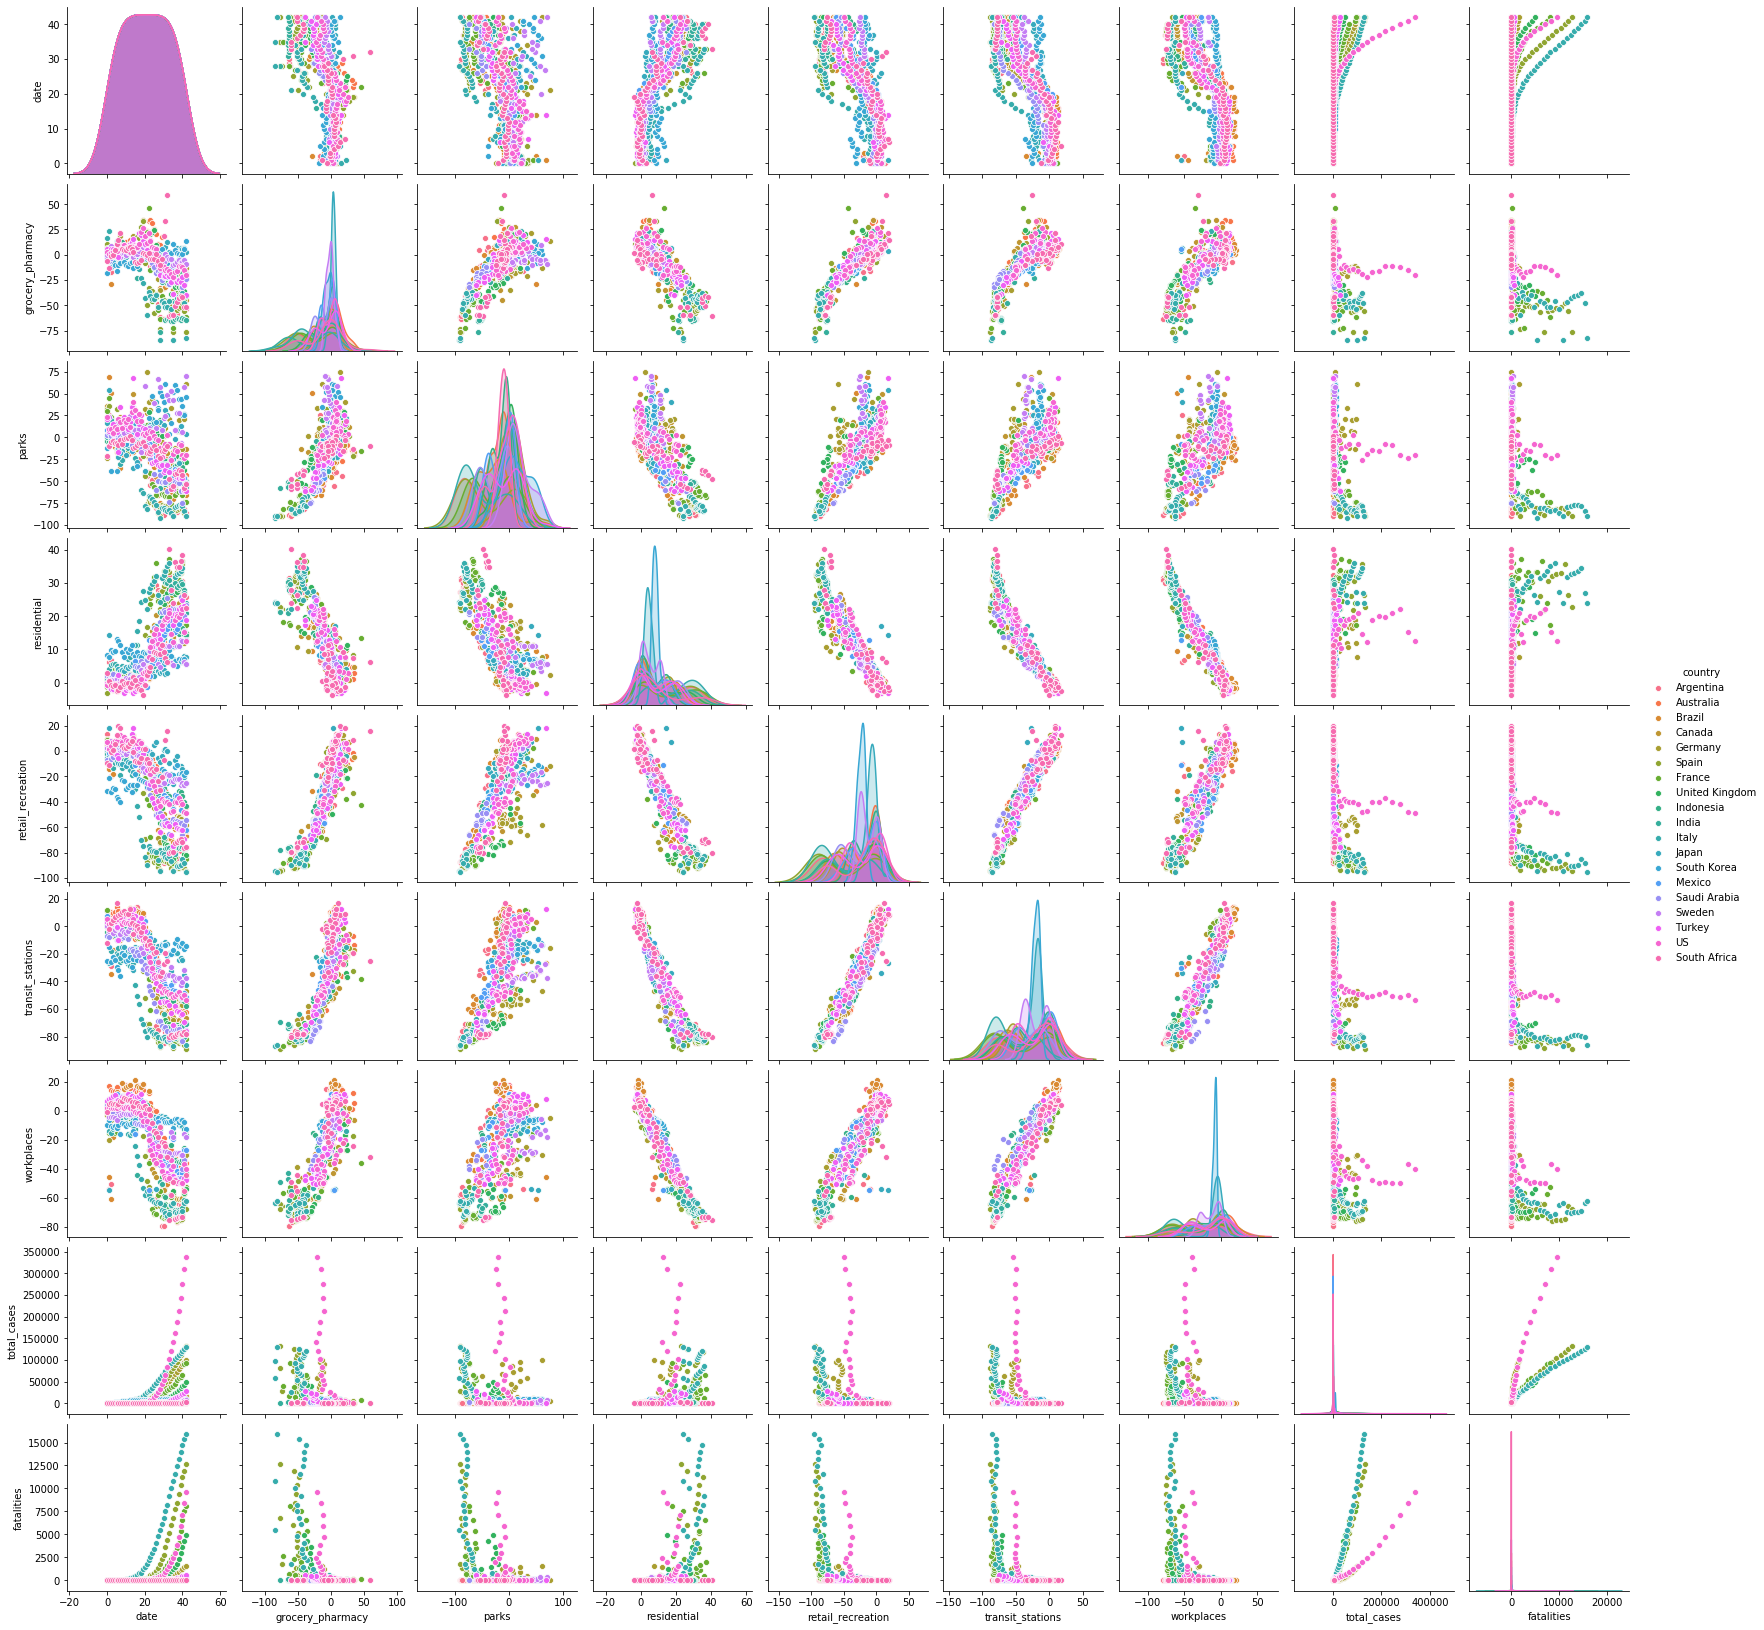

In [9]:
sb.pairplot(covid_data.dropna(),hue="country")
;

We can already see that some data correlates in a linear way, for instance, retail_recreation & transit_stations. Also, the total_cases and fatalities relates in an exponential way with the date.

At a first sight, no outliers are obvious, that can be derived from the fact that the number of samples is high. 

We can also make this kind of plot without country division:

''

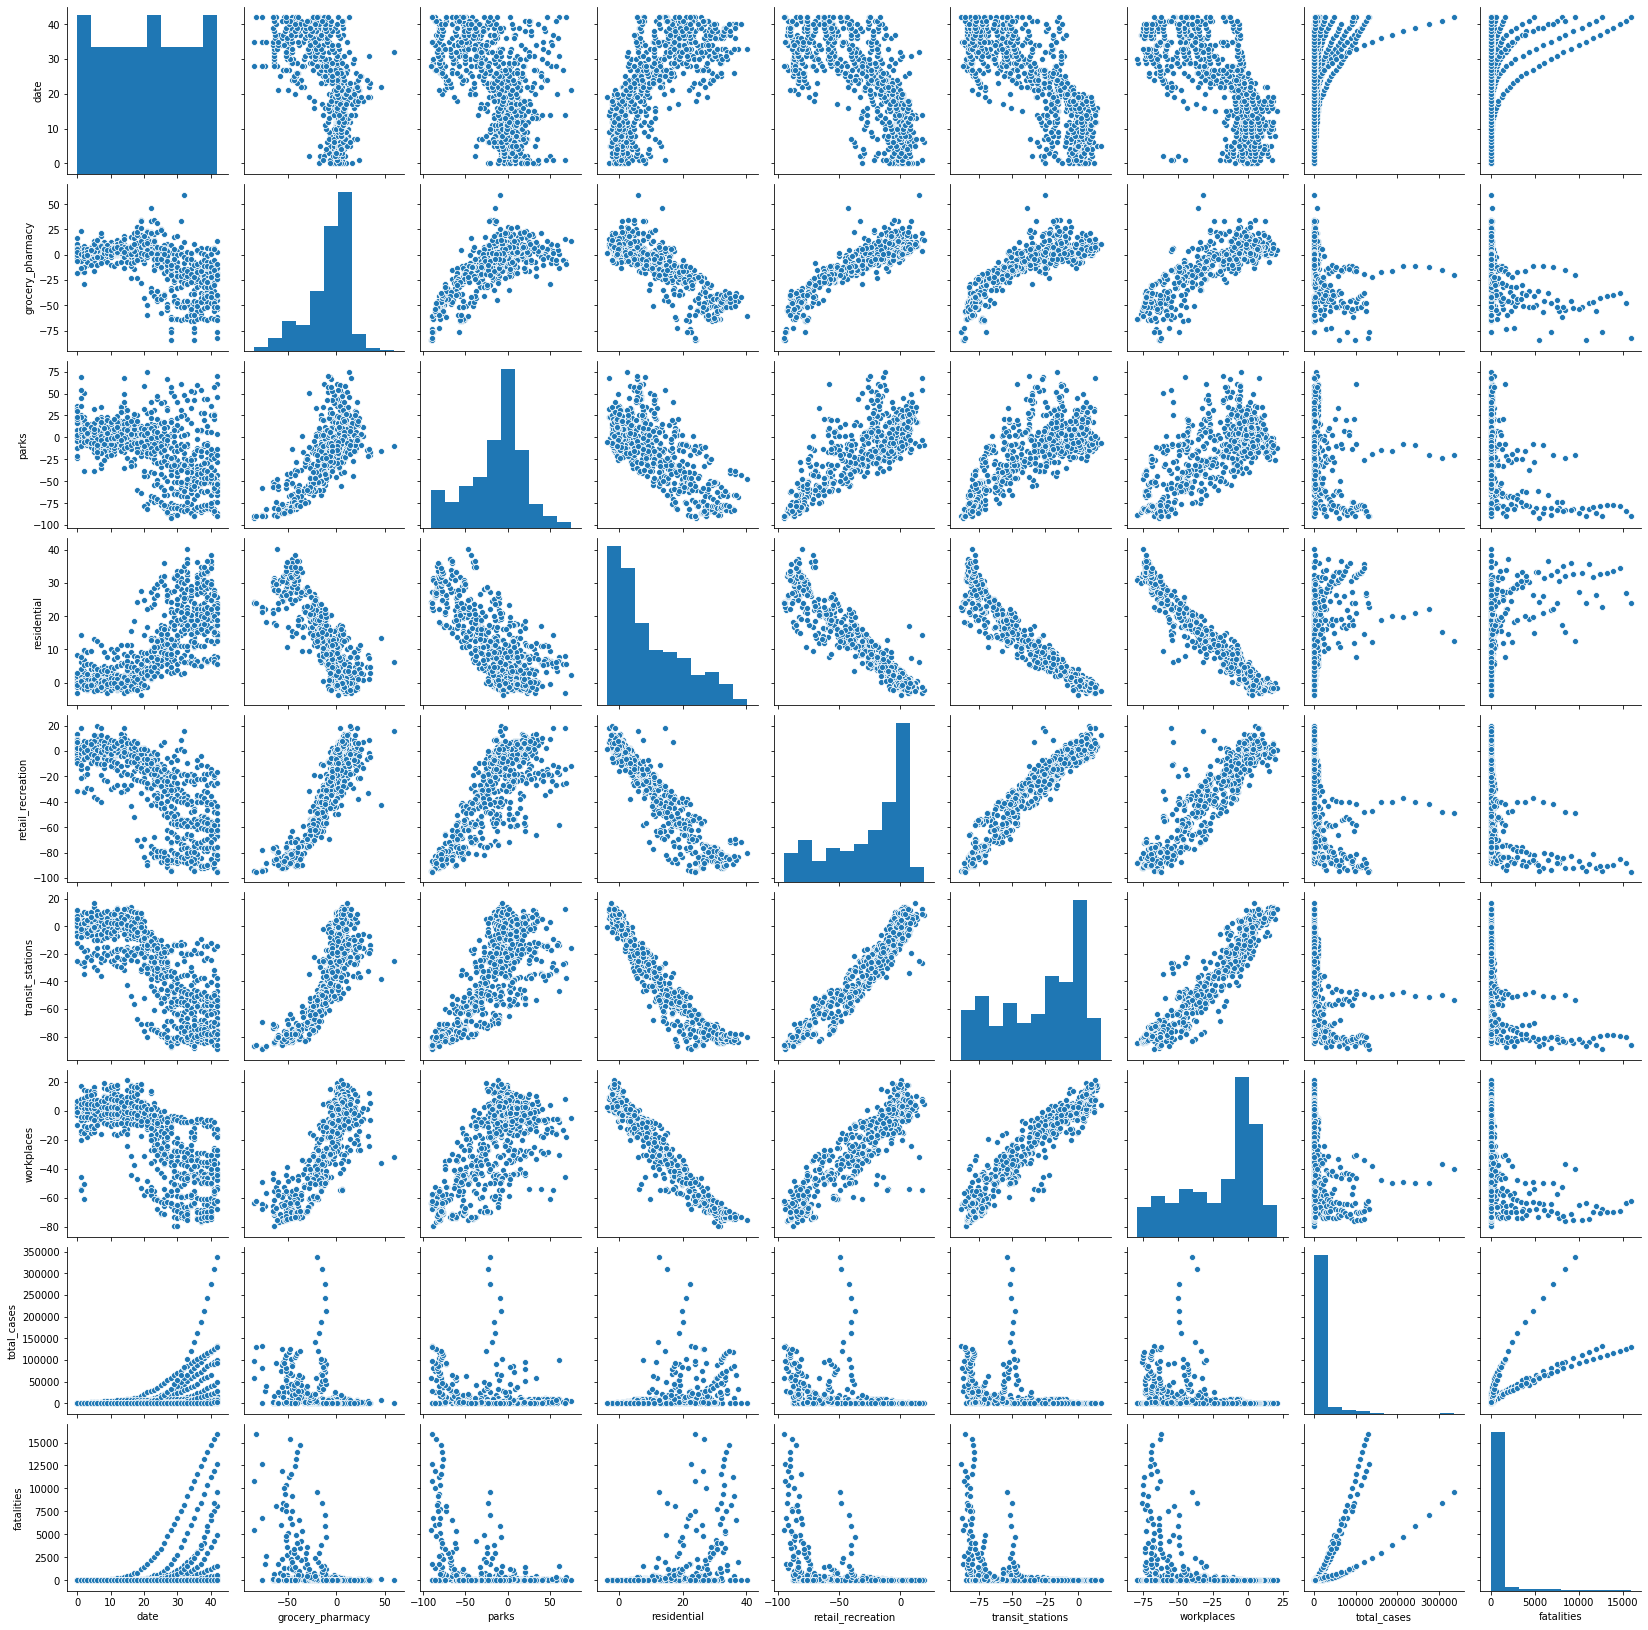

In [10]:
sb.pairplot(covid_data.dropna())
;

Notice how total_cases and fatalities relate to date in a logaritmic way. Let's transform this data and see how it behaves for one of the countries:


<ipython-input-9-74c993724dd8>:13: RuntimeWarning: divide by zero encountered in log
  axs[1,0].scatter(days_column,np.log(total_cases_column))
<ipython-input-9-74c993724dd8>:20: RuntimeWarning: divide by zero encountered in log
  axs[1,1].scatter(days_column,np.log(fatalities_column))


[Text(0, 0.5, 'log(Fatalities)'), Text(0.5, 0, 'Days')]

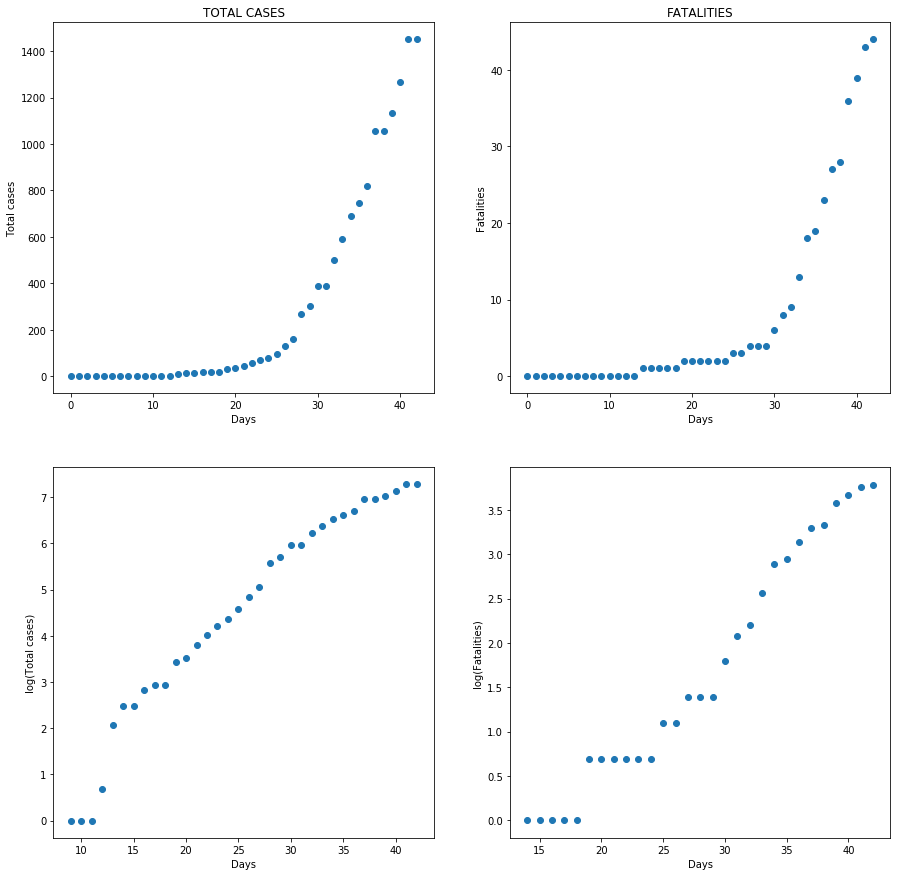

In [9]:
days_column=np.array(covid_data.loc[:,"date"])[:43]
total_cases_column=np.array(covid_data.loc[:,"total_cases"])[:43]
fatalities_column=np.array(covid_data.loc[:,"fatalities"])[:43]



import matplotlib.pyplot as plt
fig,axs=plt.subplots(2,2,figsize=(15,15))
axs[0,0].scatter(days_column,total_cases_column)
axs[0,0].set(xlabel="Days",ylabel="Total cases")
axs[0,0].set_title("TOTAL CASES")

axs[1,0].scatter(days_column,np.log(total_cases_column))
axs[1,0].set(xlabel="Days",ylabel="log(Total cases)")

axs[0,1].scatter(days_column,fatalities_column)
axs[0,1].set(xlabel="Days",ylabel="Fatalities")
axs[0,1].set_title("FATALITIES")

axs[1,1].scatter(days_column,np.log(fatalities_column))
axs[1,1].set(xlabel="Days",ylabel="log(Fatalities)")




Well it's not perfect, but we can see some behaviour in this way.

## Methods & Discussion of Results
The next sections and notebooks contain the methods and results of different approaches that were made in this project.

## Divide the data
It is important that we don't use the same countries for training and testing the data, since we samples of the same countries would create bias entries for testing. 

There are two obvious regression problems we can try to solve using this data: predicting the total_cases and the fatalities according to the other columns of features.


## First regression problem: predict total_cases
For this first problem, the following features will be used:

 * Grocery_pharmacy
 * Parks
 * Residential
 * Retail_recreation 
 * Transit_stations
 * Workplaces
 * Number of total_cases in the previous day
 
Notice that we don't use fatalities for this problem, as it would be a bias feature for this problem. For the next task, the fatalities will be predicted with and without the total number of cases, for results comparison.

For implementing a cross validation method that considers the country separation, we will be using sklearn.model_selection methods, like GroupKFold.

Also, notice that our data takes account a time series, so we added an extra feature column. We are trying to predict the total_cases in a certain day, so we added the total_cases in the previous day to features column. In order to do this, in day 0, for the countries that the total_cases were different from 0, that line was deleted from the features.

In this first attempt, the division of train and test sets will be made by country!

In [10]:
data=covid_data.copy()

previous_cases_column=[]
for i in range(0,len(data.date)):
  if data.date[i]==0:
    if data.total_cases[i]==0:
        previous_cases_column.append(0)
    else:
        previous_cases_column.append(-1)
  else:
    previous_cases_column.append(data.total_cases[i-1])

    
previous_cases_column=np.array(previous_cases_column)

data["previous_total_cases"]=previous_cases_column

days43=(data.previous_total_cases!=-1)
data=data[days43]
data=data.reset_index(drop=True)
print(data.shape)

all_features=data[['grocery_pharmacy','parks','residential','retail_recreation','transit_stations','workplaces','previous_total_cases']].values
all_labels=data['total_cases'].values
all_groups=np.array(data.loc[:,"country"])

print("Features shape : ",all_features.shape)
print("All labels shape : ", all_labels.shape)
print("All groups shape : ", all_groups.shape)

(806, 11)
Features shape :  (806, 7)
All labels shape :  (806,)
All groups shape :  (806,)


It is important to normalize/standardize our data, this should be done individually for each train/val/test set, so there's no bias in the values that help us do this normalization.

Let's take a look again to our data statistics:


In [11]:
data.describe()

date  grocery_pharmacy       parks  residential  \
count  806.000000        806.000000  806.000000   806.000000   
mean    21.286600         -8.385151  -13.738919     9.671969   
std     12.255094         21.393510   32.909218    10.556458   
min      0.000000        -84.798000  -91.456000    -3.647000   
25%     11.000000        -16.929250  -33.377000     0.780250   
50%     21.000000          0.052500   -6.849000     6.142000   
75%     32.000000          4.738250    6.490500    16.847750   
max     42.000000         59.474000   75.002000    40.343000   

       retail_recreation  transit_stations  workplaces    total_cases  \
count         806.000000        806.000000  806.000000     806.000000   
mean          -26.552326        -28.780753  -19.378757   10844.595533   
std            31.035204         30.190194   26.066066   31847.533829   
min           -95.158000        -88.956000  -79.293000       0.000000   
25%           -51.172500        -54.394000  -41.153500      30.000000   
50%           -15.015500        -19.723000   -8.567000     671.500000   
75%            -0.754250         -1.419500    1.025500    4813.750000   
max            19.699000         16.822000   21.347000  336912.000000   

         fatalities  previous_total_cases  
count    806.000000            806.000000  
mean     573.718362           9688.316377  
std     2021.103132          28755.936634  
min        0.000000              0.000000  
25%        0.000000             20.000000  
50%        7.000000            525.000000  
75%       83.250000           4199.250000  
max    15887.000000         308693.000000

Looking at the mean, std, min and max values, we can see that if we do not normalize this data, some features may have more importance than others. 

To prevent this, it's important to normalize the features. But first, we can analyse the data throughout a number of algorithms and metrics to see which might be the one that can better fit this data.

In order to do this, we use GroupKFold to separate the data in the first place:

In [12]:
from sklearn.model_selection import GroupKFold

#Define number of splits
n_splits=5

group_kfold=GroupKFold(n_splits=n_splits)
print("Splits", group_kfold.get_n_splits(all_features,all_labels,all_groups))
print(group_kfold)

Splits 5
GroupKFold(n_splits=5)


Example for K-Fold Split taking groups in considerations! We make 5 different splits from our data. As we can see bellow, none of the test ID's (countries) are the same in each split.

In [13]:
counter=1
for train_idx,test_idx in group_kfold.split(all_features,all_labels,all_groups):
    print("SPLIT : ", counter)
    #print("TRAIN :", train_idx, "    TEST : ", test_idx)
    print("TRAIN SPLIT: ")
    print(np.unique(np.array(data.loc[train_idx]["country"])))
    print("TEST SPLIT: ")
    print(np.unique(np.array(data.loc[test_idx]["country"])))
    print("\n")
    counter+=1

SPLIT :  1
TRAIN SPLIT: 
['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India' 'Indonesia'
 'Italy' 'Japan' 'Saudi Arabia' 'South Africa' 'South Korea' 'Spain'
 'Turkey' 'US']
TEST SPLIT: 
['Argentina' 'Mexico' 'Sweden' 'United Kingdom']


SPLIT :  2
TRAIN SPLIT: 
['Argentina' 'Australia' 'Brazil' 'Canada' 'France' 'Germany' 'Indonesia'
 'Italy' 'Mexico' 'Saudi Arabia' 'South Africa' 'South Korea' 'Spain'
 'Sweden' 'United Kingdom']
TEST SPLIT: 
['India' 'Japan' 'Turkey' 'US']


SPLIT :  3
TRAIN SPLIT: 
['Argentina' 'Australia' 'Canada' 'France' 'Germany' 'India' 'Japan'
 'Mexico' 'Saudi Arabia' 'South Africa' 'South Korea' 'Spain' 'Sweden'
 'Turkey' 'US' 'United Kingdom']
TEST SPLIT: 
['Brazil' 'Indonesia' 'Italy']


SPLIT :  4
TRAIN SPLIT: 
['Argentina' 'Australia' 'Brazil' 'France' 'India' 'Indonesia' 'Italy'
 'Japan' 'Mexico' 'Saudi Arabia' 'Spain' 'Sweden' 'Turkey' 'US'
 'United Kingdom']
TEST SPLIT: 
['Canada' 'Germany' 'South Africa' 'South Korea']


SPLIT :  5
TRAIN SPLIT: 

After creating this sets, we can use group_kfold generator to plot learning curves for many algorithms and evaluation metrics. In the next steps, we'll be performing algorithms such as:
 * K-Nearest Neighbors
 * Linear Regression
 * Naive Bayes
 * Stochastic Gradient Descent
 * SVM - Support Vector Machines
 * MLP - Multi-Layer Perceptron
 * Decision Trees
 * Random Forest
 
And also metrics like:
 * Mean Squared Error (MSE)
 * Max Error
 * Mean absolute error
 * R^2 
 
After this, we'll discuss which algorithm performed the best.

The next section of code is a function (plot_learning_curve) provided bu scikit-learn will help us plot interesting curves about our models performance.

In [14]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, groups,scoring, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20,3))
    plt.subplots_adjust(top=2)
    plt.rcParams.update({'font.size': 15})

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, 
                       groups=groups,
                       cv=cv,
                       scoring=scoring, 
                       n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



Now it's time to put this into work!

In [15]:
#Import modules for models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model #linear_model.SGDRegressor()
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn import tree #tree.DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor


#Import modules for metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


It is important to notice that the hyper-parameters of the models must adjust to our data, in a first approach to choose the best type of model, these are going to be pseudo-random, enabling a fast fit of the data, because we are using 7 different models with 4 different types of metrics, which takes some minutes to train and plot the learning curves.

In [16]:
#Define models, titles and metrics
models=[LinearRegression(),
       KNeighborsRegressor(n_neighbors=3),
       GaussianNB(),
       linear_model.SGDRegressor(max_iter=1000),
       SVC(max_iter=1000),
       MLPRegressor(),
       tree.DecisionTreeRegressor(max_depth=10),
       RandomForestRegressor(n_estimators=10,max_depth=10)]

titles=["Learning Curves (Linear Reg)",
        "Learning Curves (KNN)",
        "Learning Curves (Naive Bayes)",
        "Learning Curves (SGD)",
        "Learning Curves (SVC)",
        "Learning Curves (MLP)",
        "Learning Curves (Decision Tree)",
        "Learning Curves (Random Forest)"]
        
metrics=['neg_mean_squared_error',
         'max_error',
         'neg_mean_absolute_error',
         'r2']

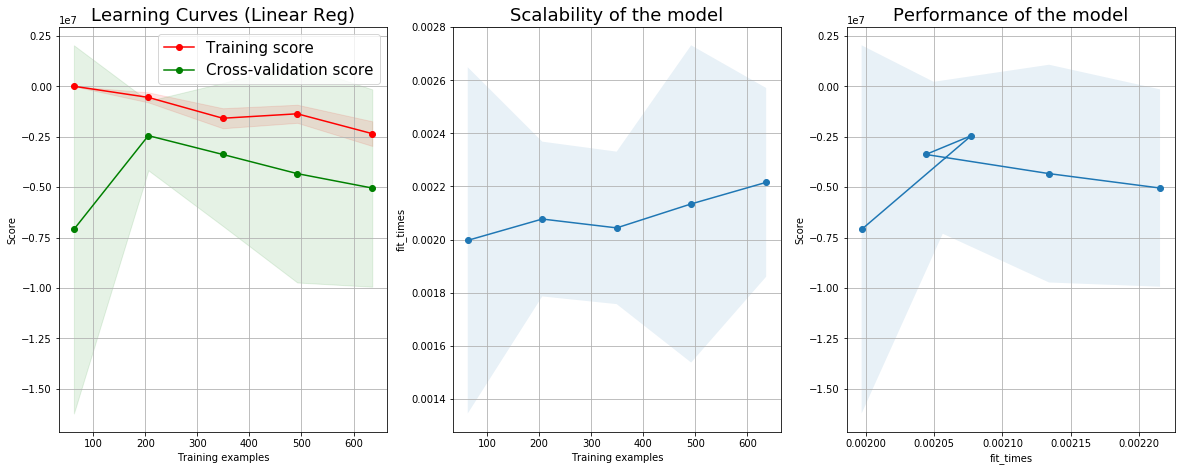

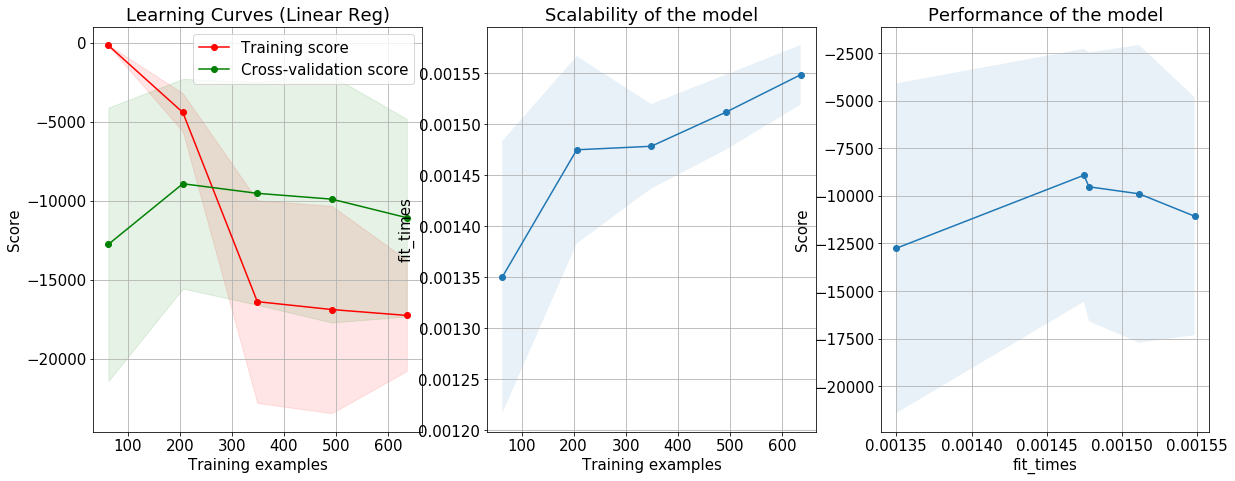

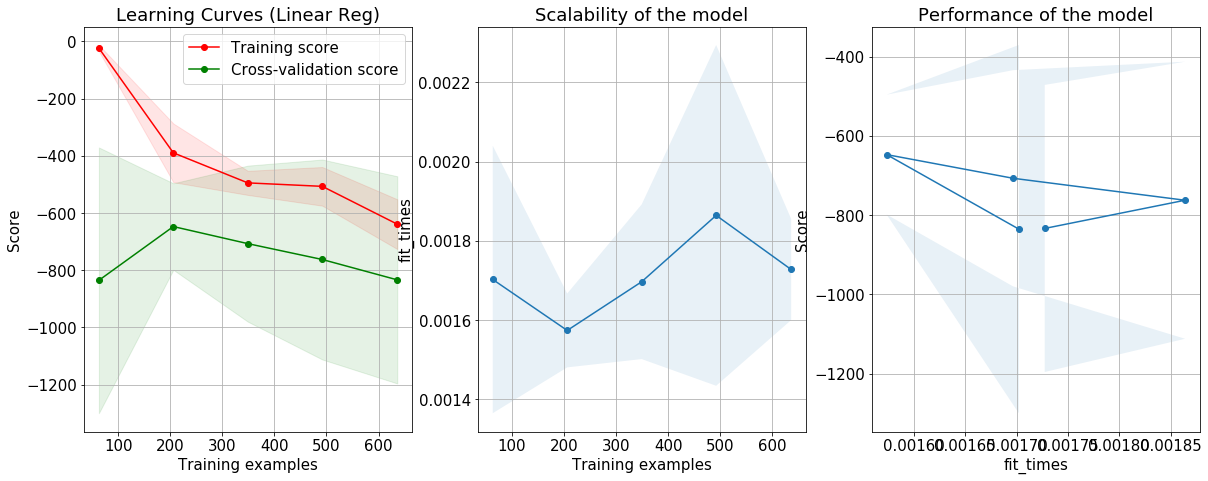

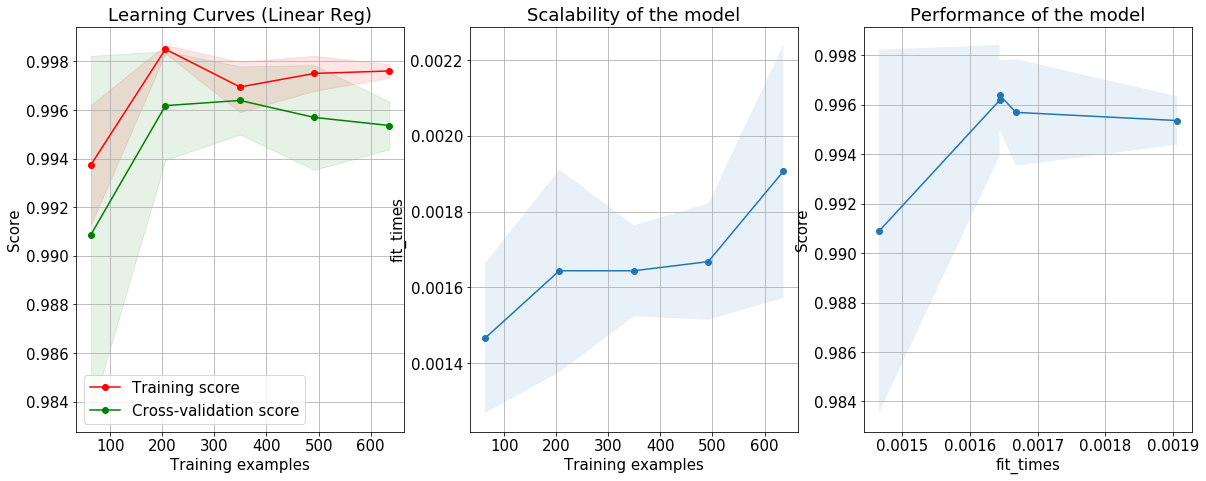

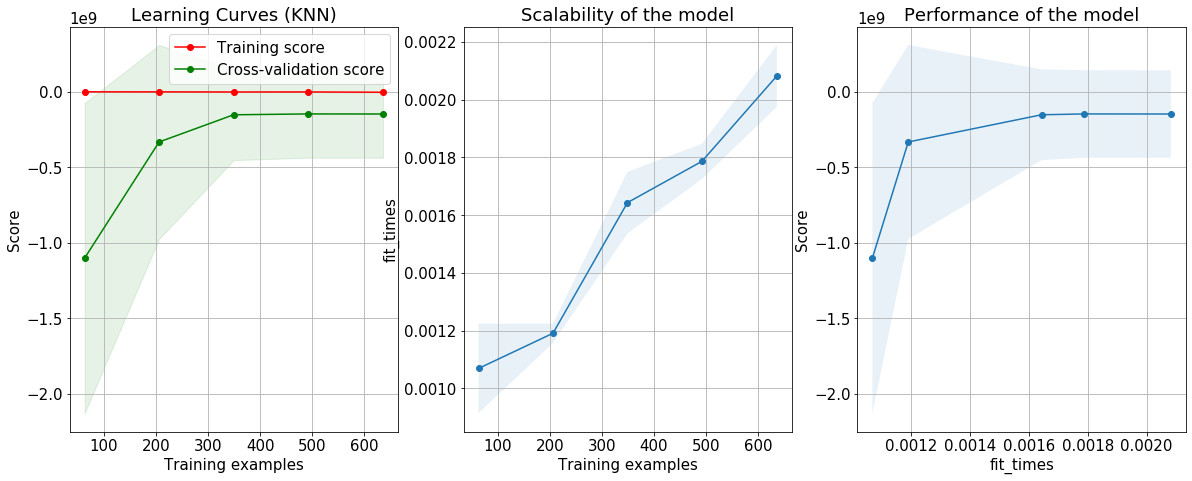

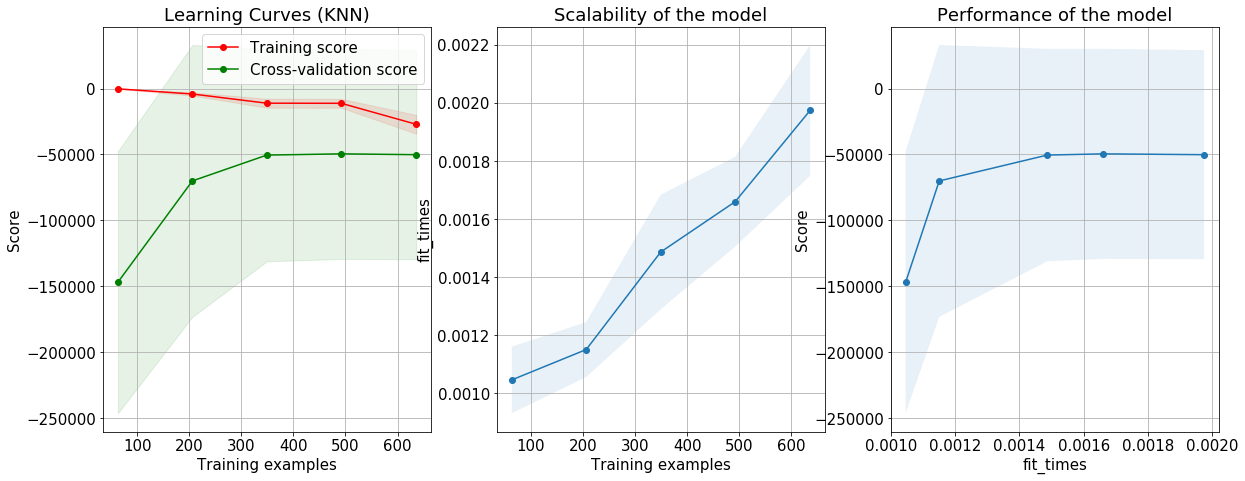

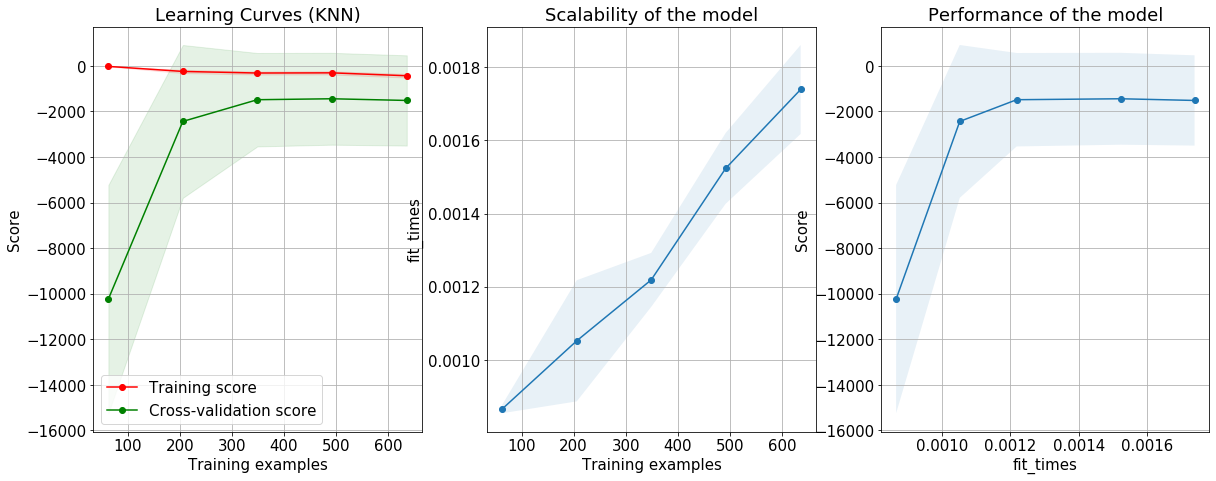

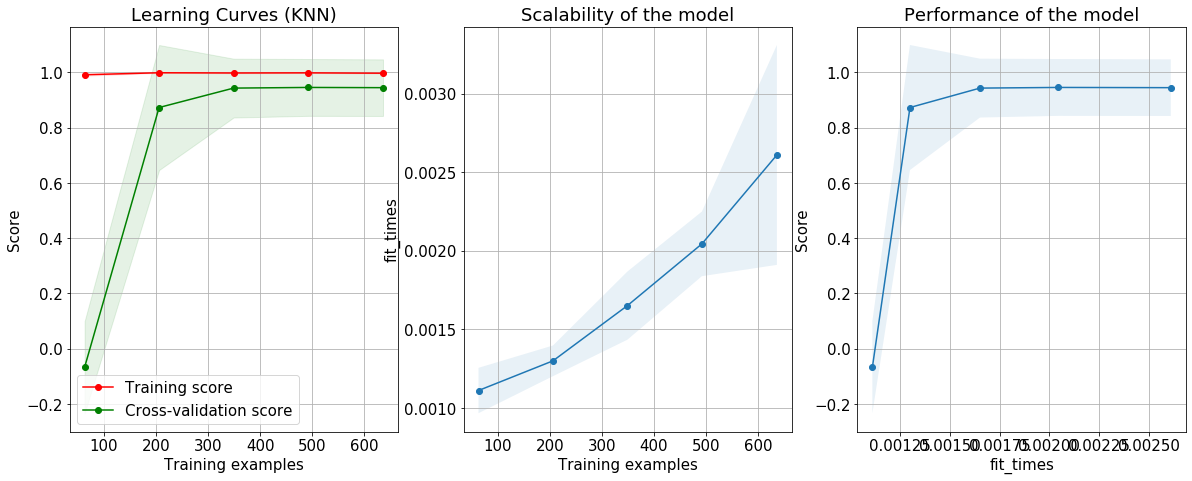

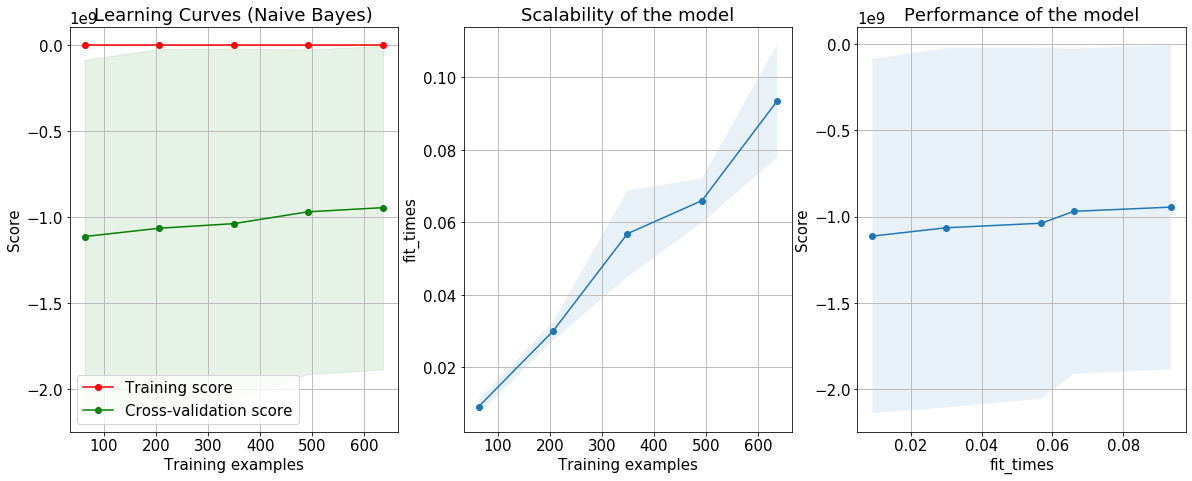

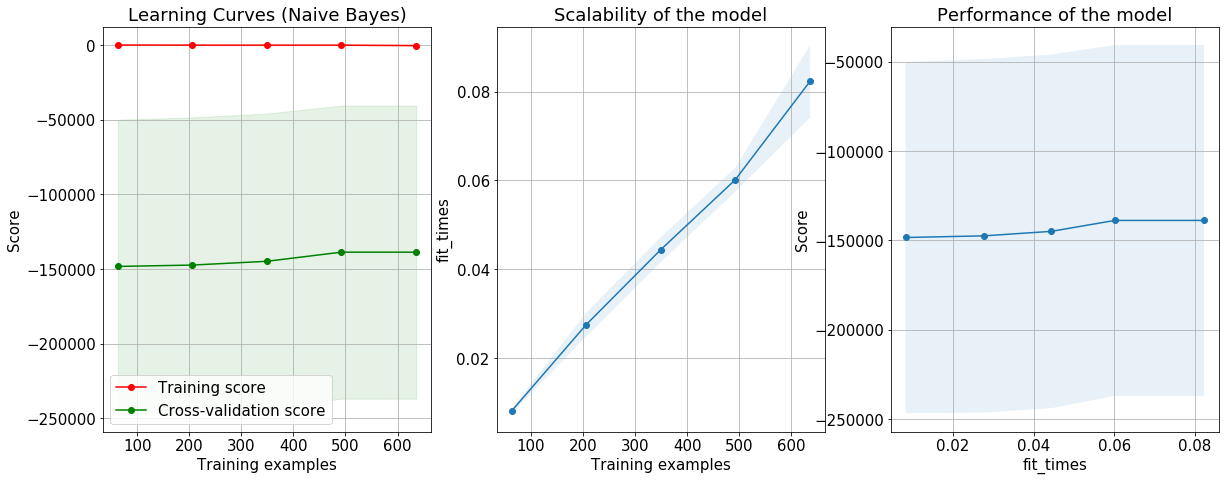

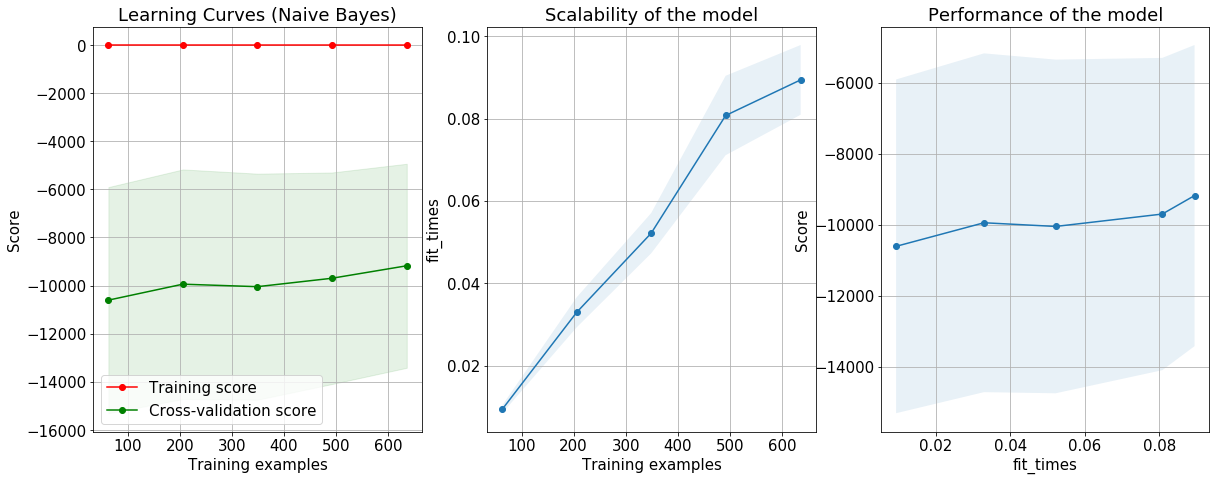

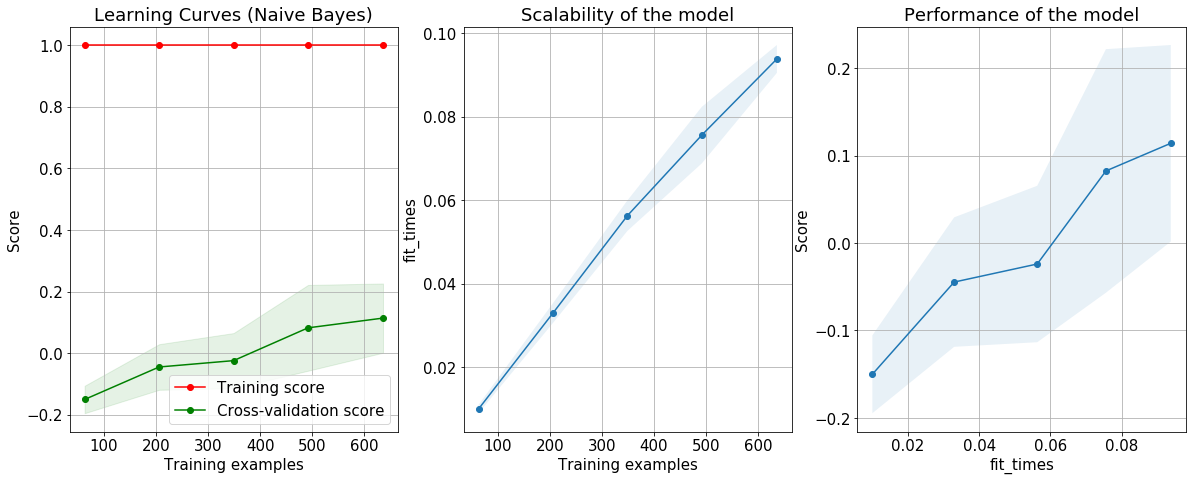

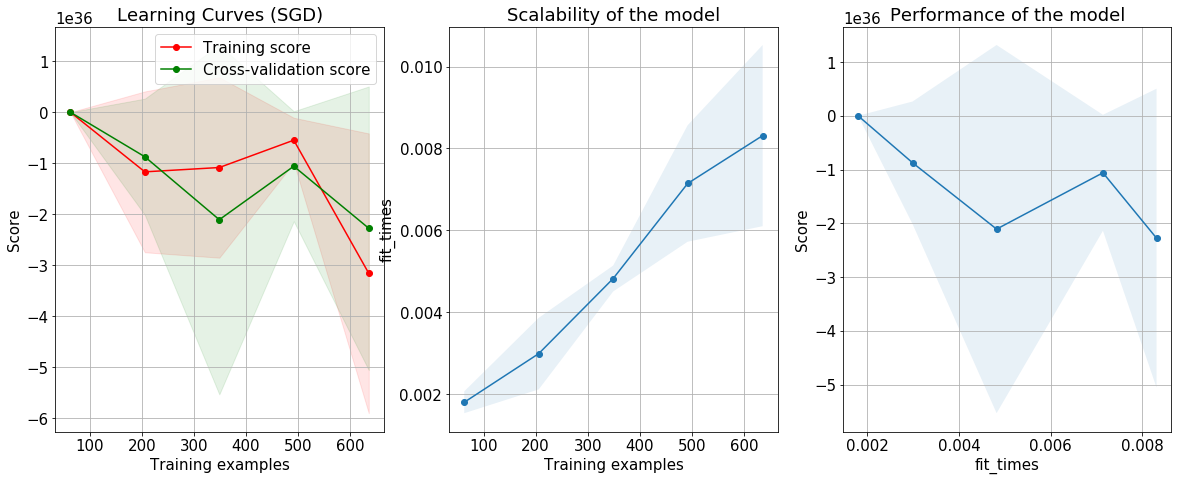

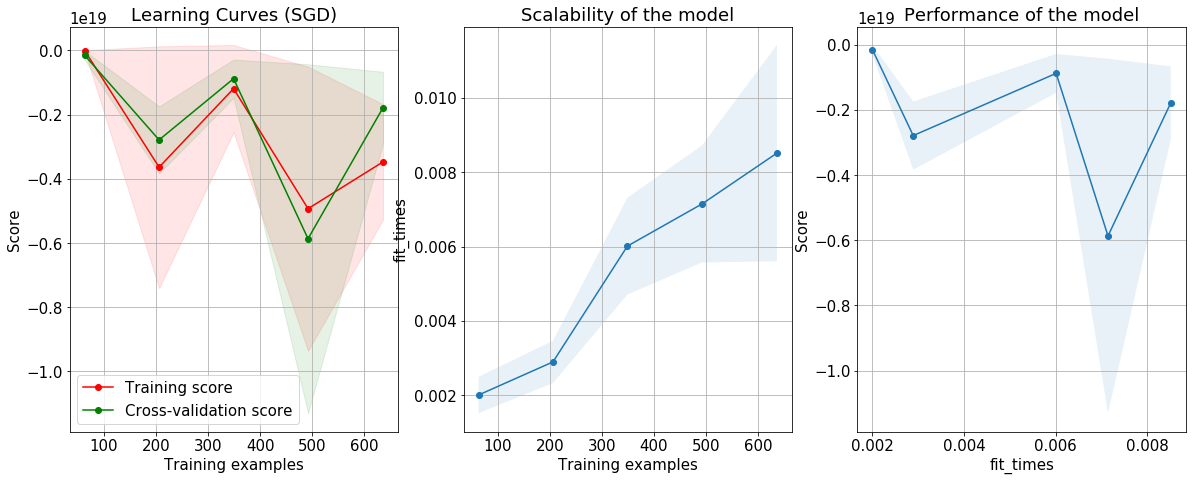

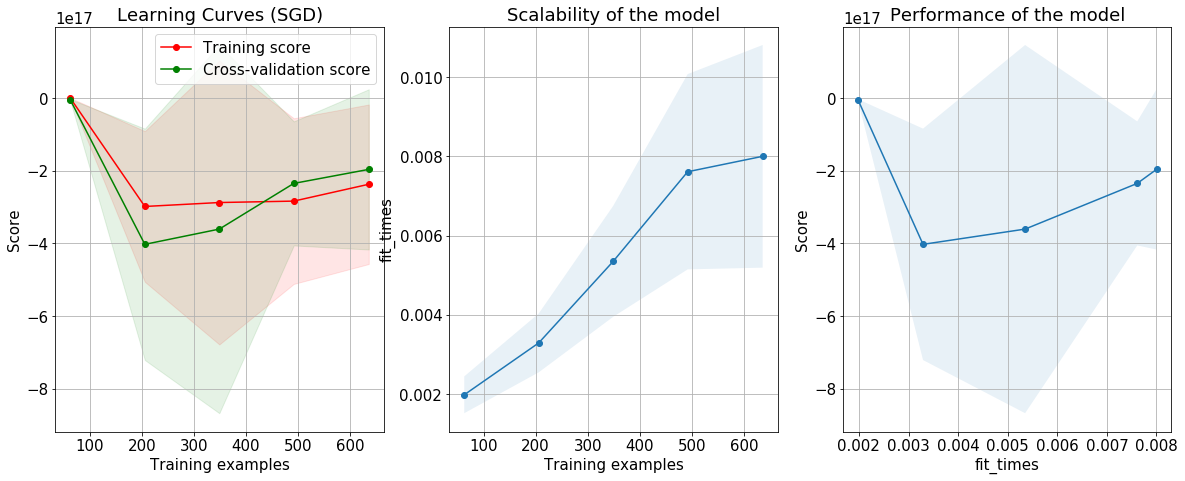

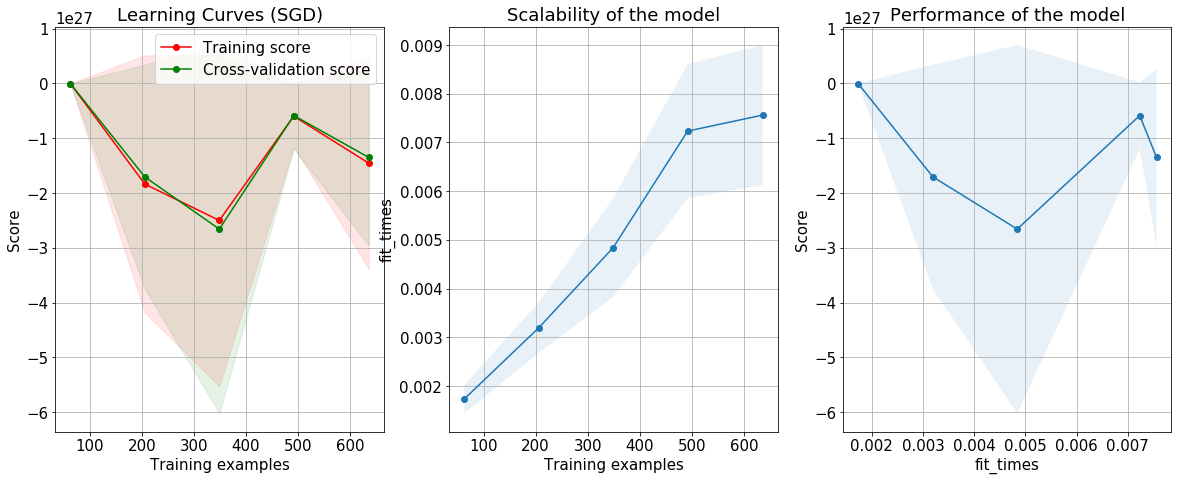

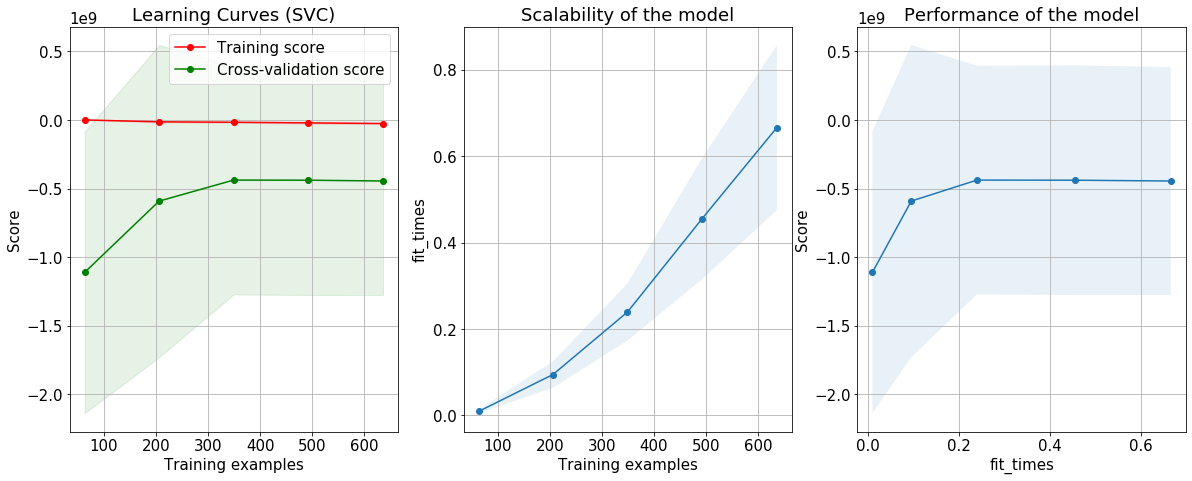

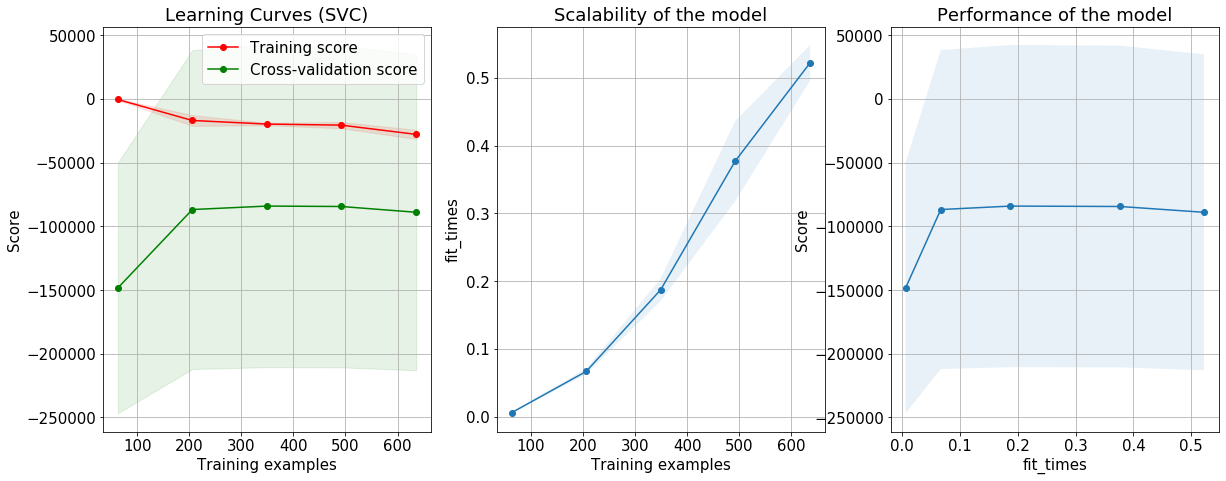

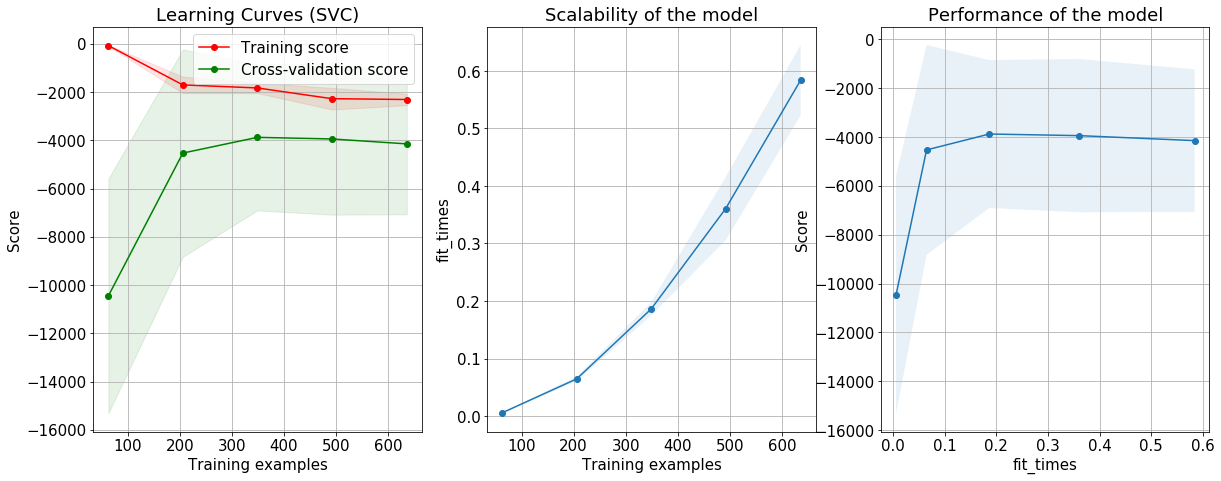

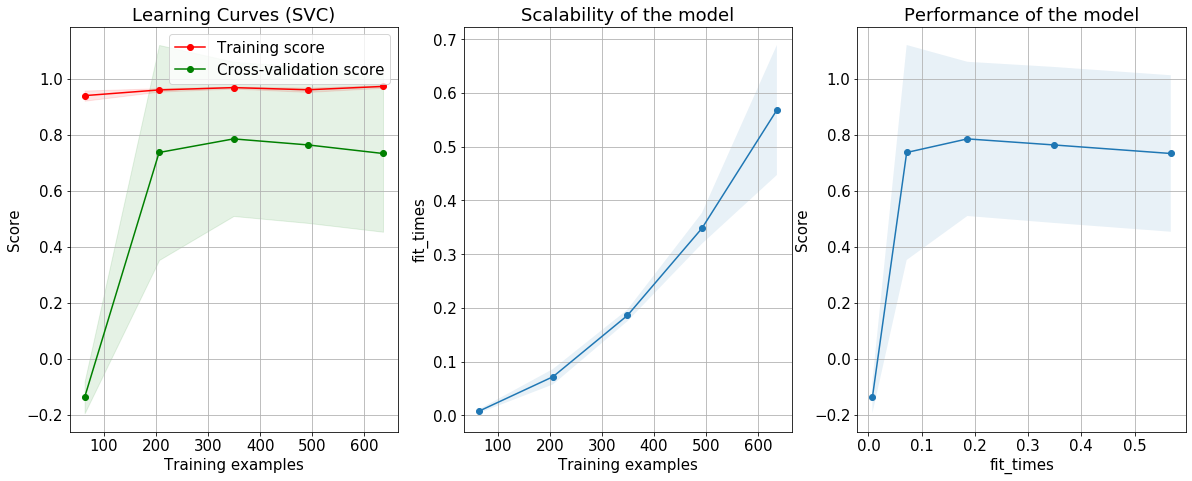

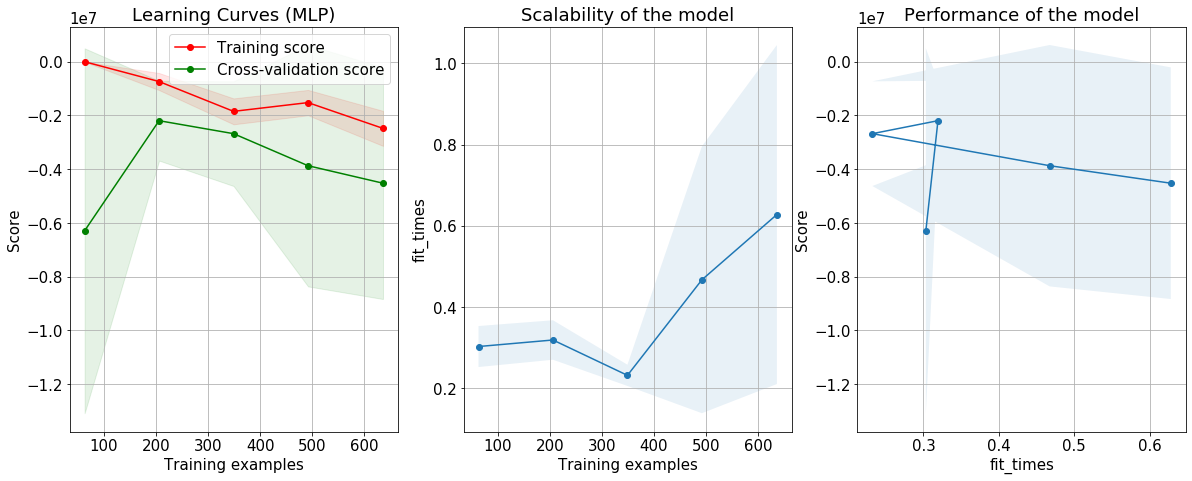

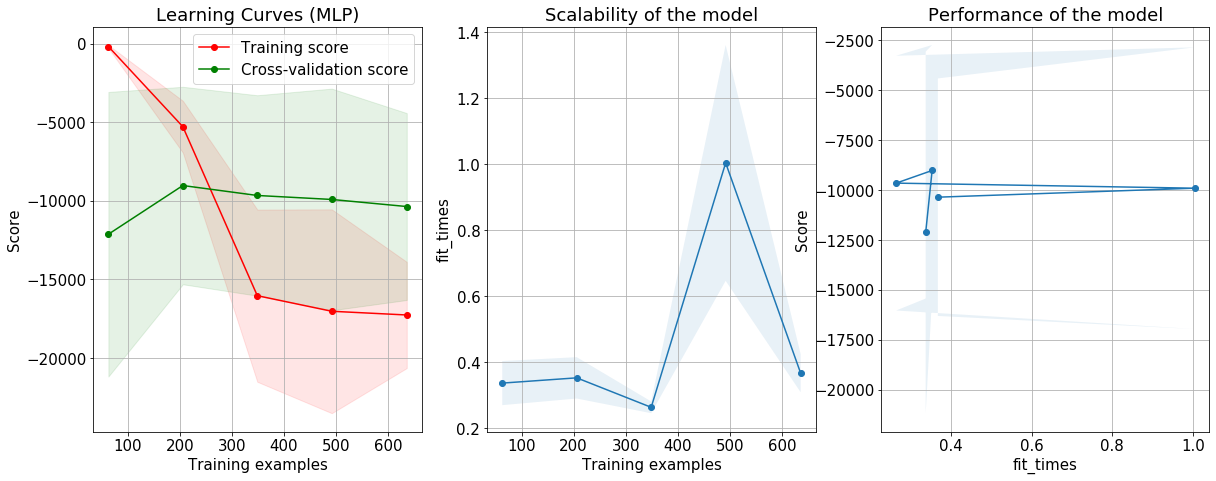

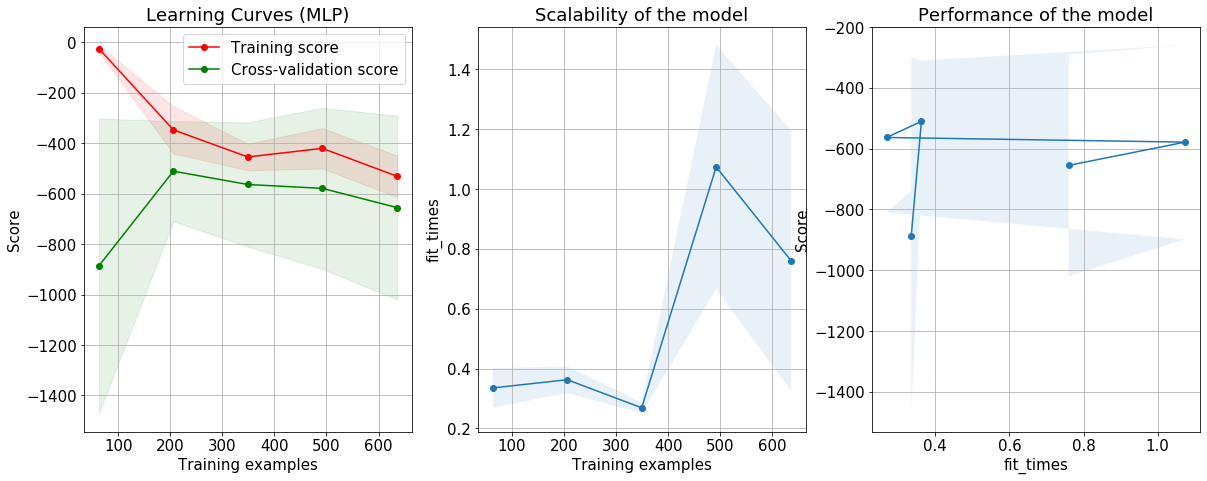

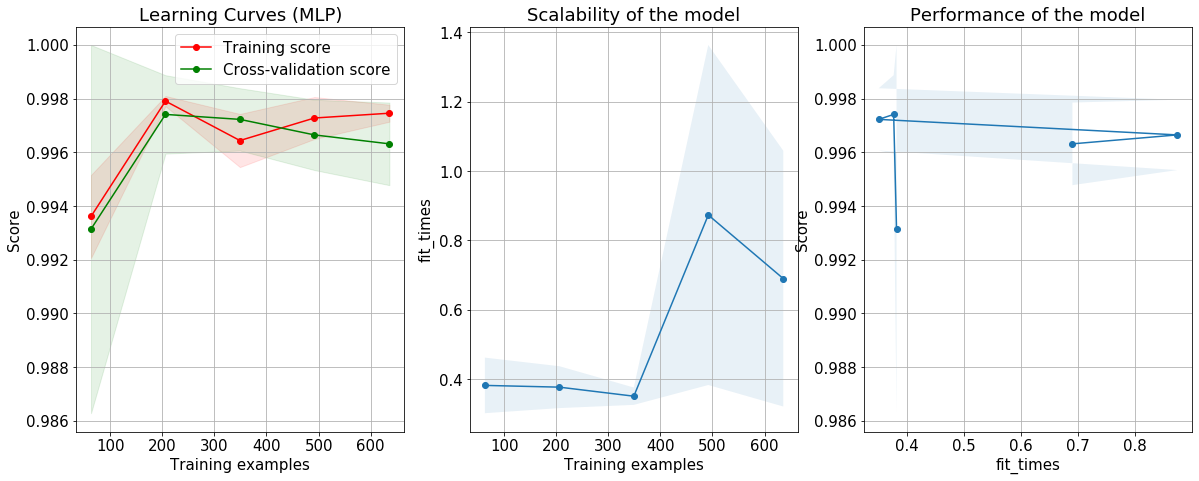

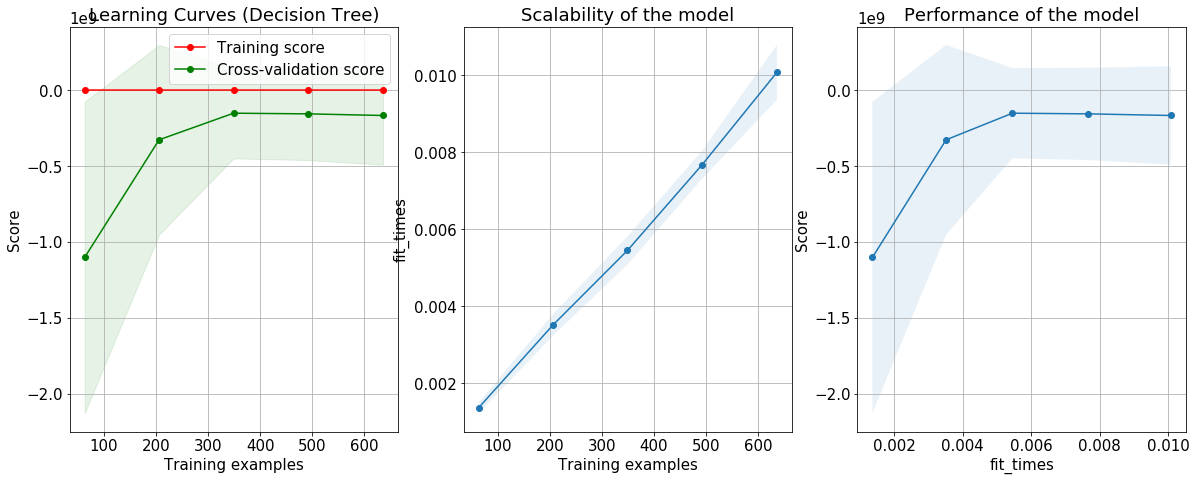

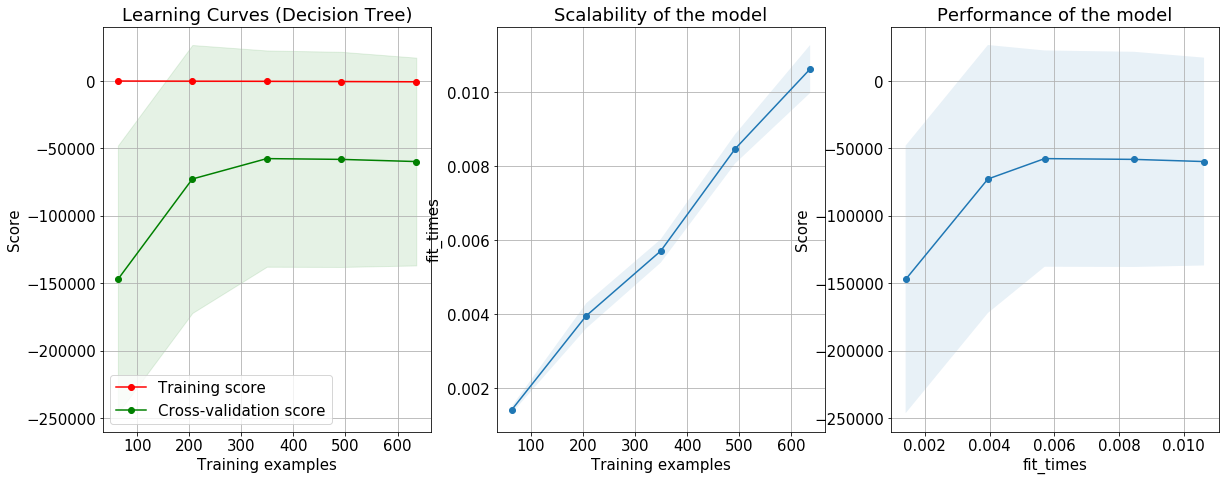

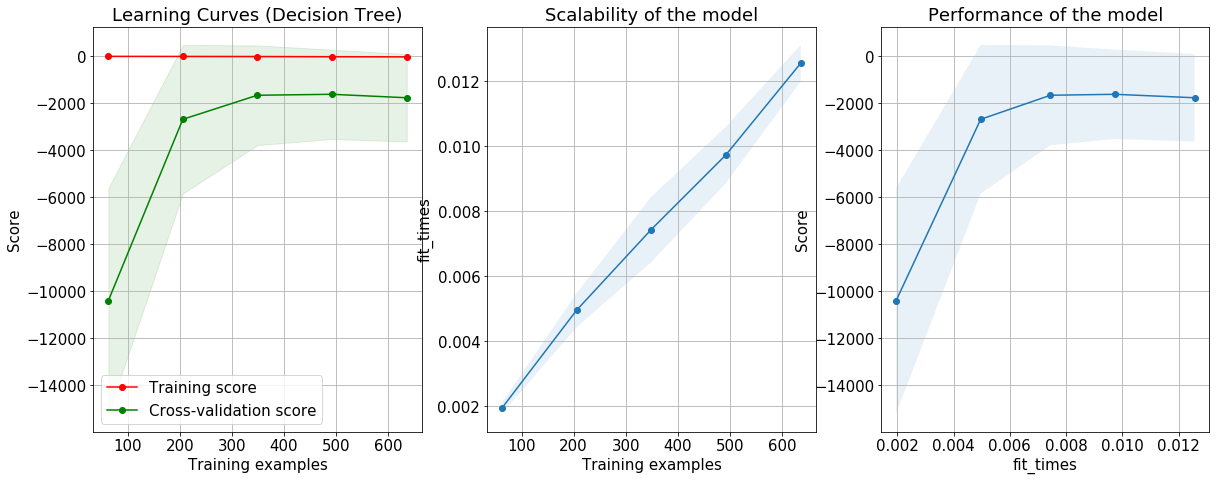

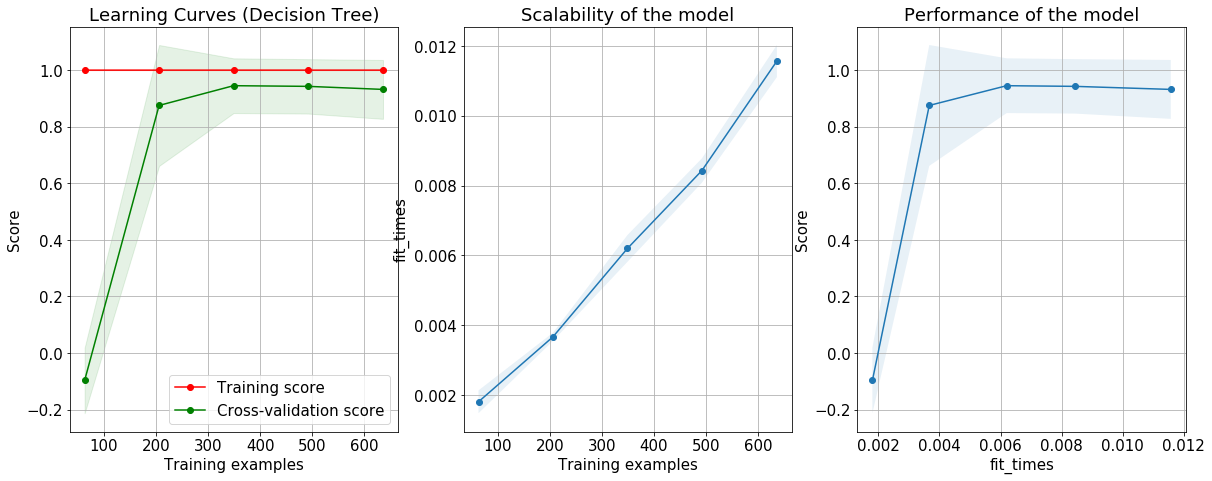

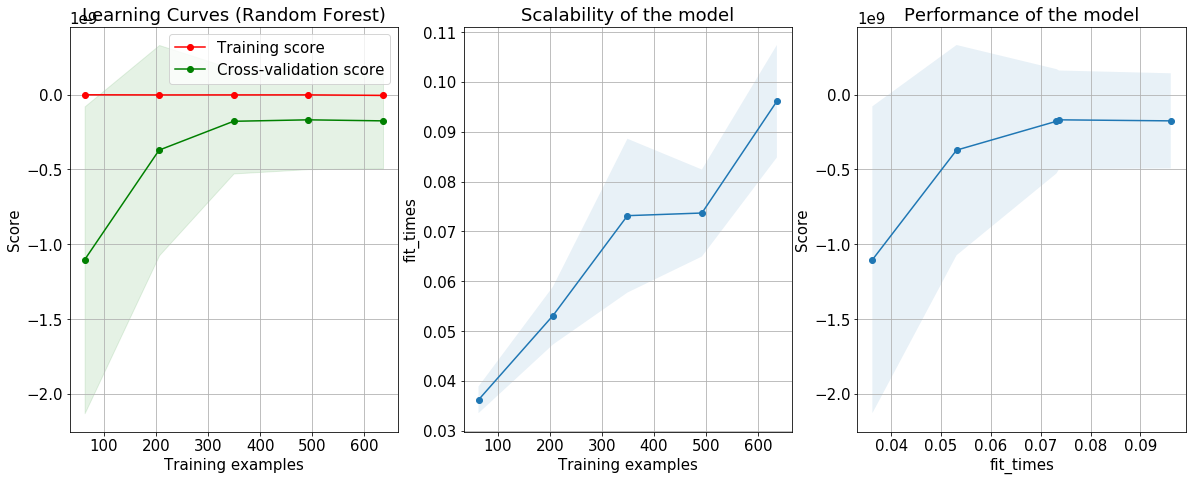

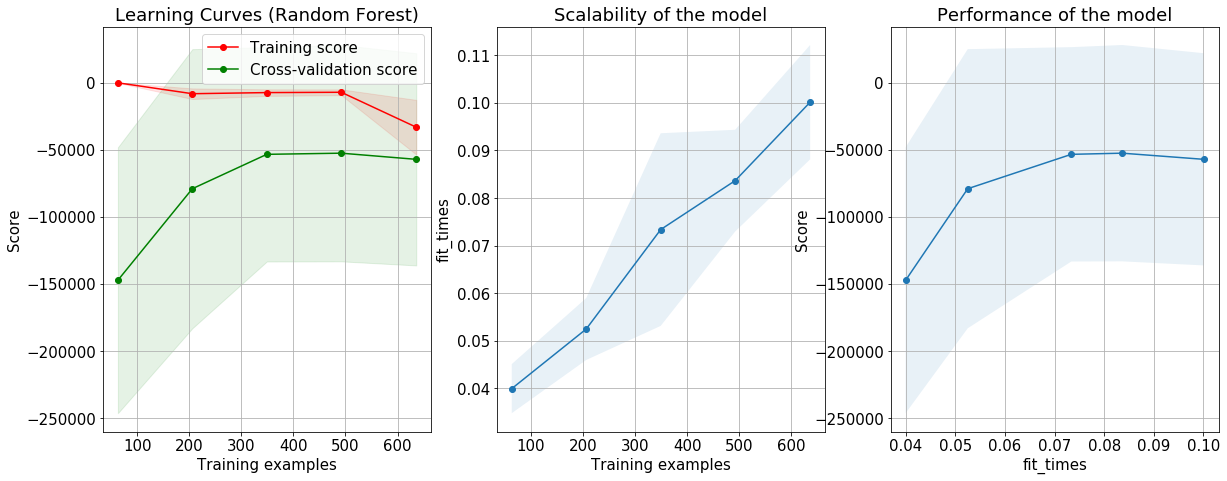

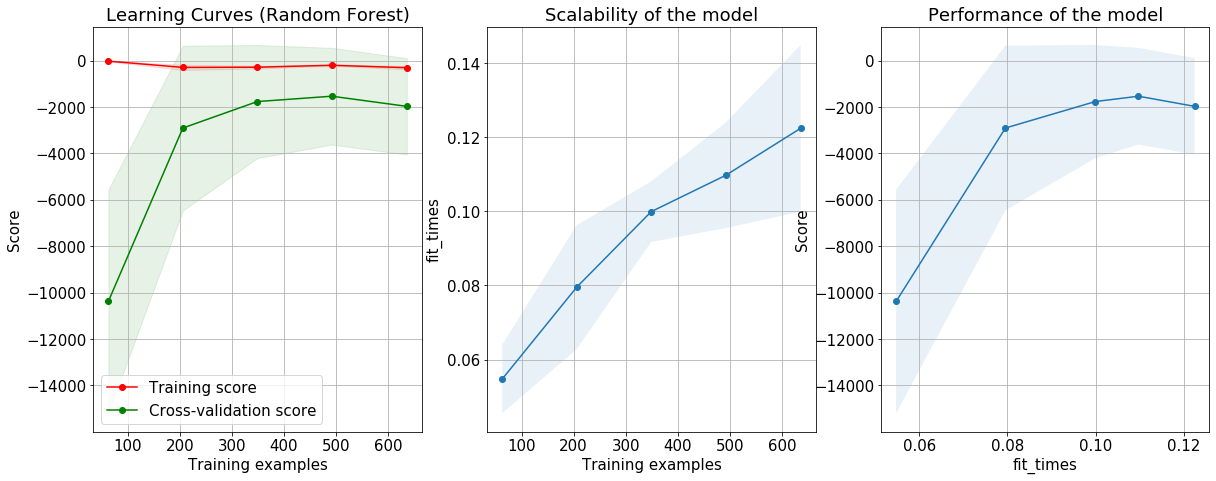

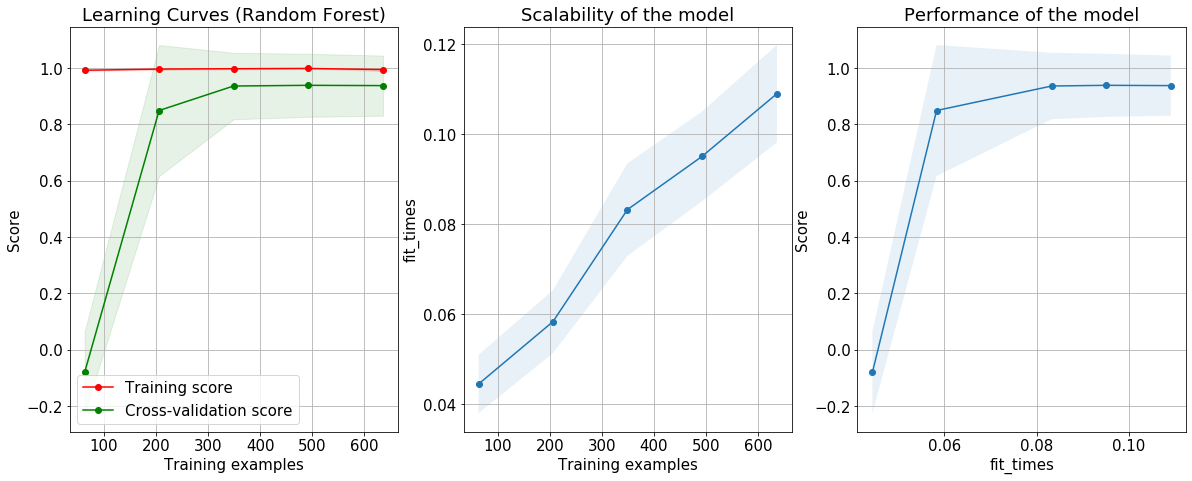

In [17]:
import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(models)):
    for metric in metrics:
        plot_learning_curve(estimator=models[i],
                    title=titles[i],
                    X=all_features,
                    y=all_labels,
                    groups=all_groups,
                    cv=group_kfold,
                    scoring=metric)

Observing the charts, we conclude that the R^2 score is the best one for preventing overfitting, having a lot of similar results in train and validation. The models that performed the best were Linear Regression, KNN, MLP, Decision Tree and Random Forests. Random Forest was the one where scalability of the model and performance of the model increased the highest, so we will be using this one to train our final model.

For standardize the data, we'll use sklearn StandardScaler from preprocessing.

The standard score of a sample x is calculated as:
\begin{equation*}
 z = \frac{x - u}{s}
\end{equation*}
where u is the mean of the training samples, and s is the standard deviation of the training samples.
    
Given that different countries have a high variety of the total number of cases, when computing metrics to evaluate the performance, minor distances between predictions and ground truth can actually translate in major scalar errors as we are dealing with really high values (in the order of dozens of thousands). Given so, the predictions and the ground truth values were also scaled through a MinMaxScaler, which computes the following for each feature: 
\begin{equation*}
 y = \frac{y_i - min(y)}{max(y)-min(xy)}
\end{equation*}



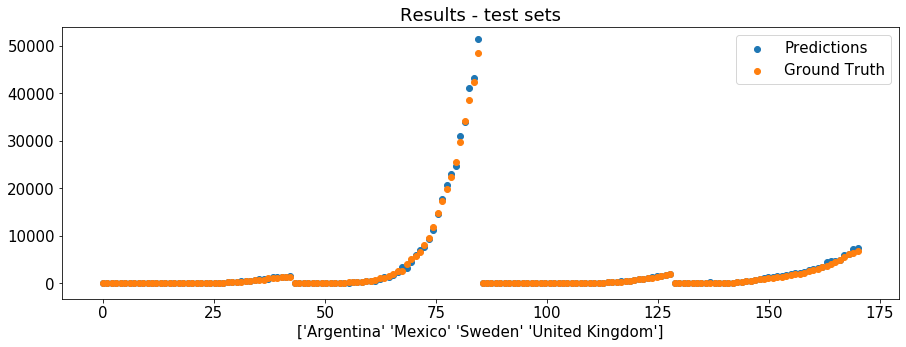

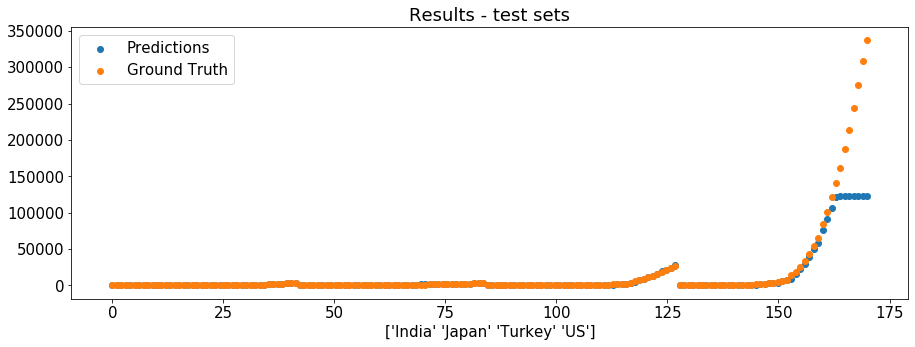

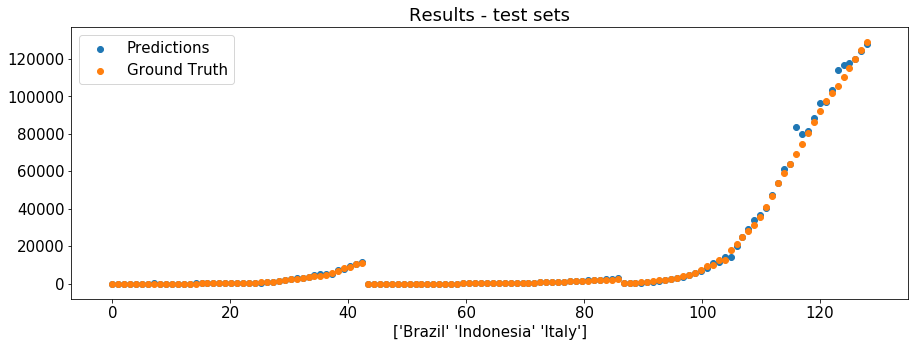

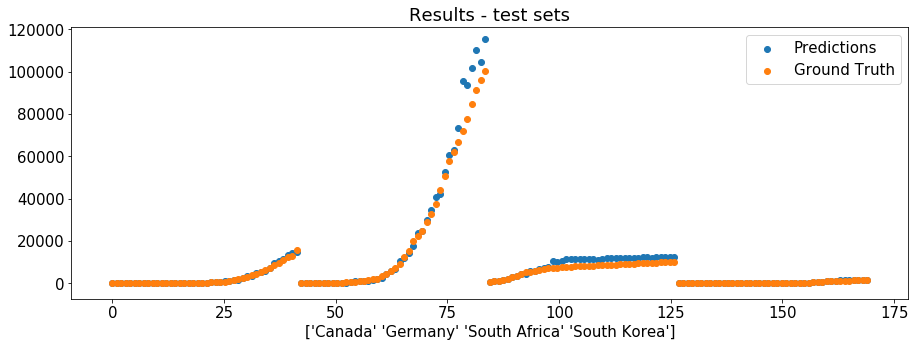

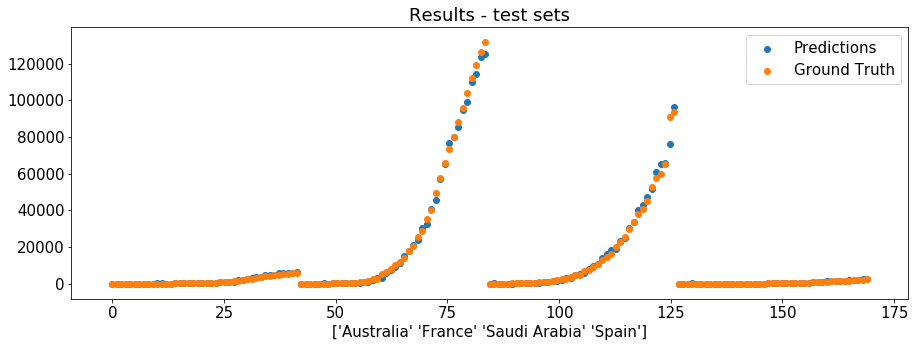

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

train_r2scores=[]
test_r2scores=[]
train_mse_scores=[]
test_mse_scores=[]
train_maxerror_scores=[]
test_maxerror_scores=[]
train_mae_scores=[]
test_mae_scores=[]

train_r2scores_scaled=[]
test_r2scores_scaled=[]
test_mae_scores_scaled=[]
train_mse_scores_scaled=[]
test_mse_scores_scaled=[]
train_maxerror_scores_scaled=[]
test_maxerror_scores_scaled=[]
train_mae_scores_scaled=[]

for train_idx,test_idx in group_kfold.split(all_features,all_labels,all_groups):
    #Train set
    train_countries=np.unique(np.array(data.loc[train_idx]["country"]))
    X_train=all_features[train_idx]
    y_train=all_labels[train_idx]
    
    #Test & Validation set
    test_countries=np.unique(np.array(data.loc[test_idx]["country"]))
    X_test=all_features[test_idx]
    y_test=all_labels[test_idx]

    #Scaling the data - only not scale the number of cases in the previous day
    scaler=StandardScaler()    
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    
    model=RandomForestRegressor()
    #model=RandomForestRegressor(n_estimators=20,max_depth=30,criterion="mae")
    model.fit(X_train,y_train)
    
    predictions_train=model.predict(X_train)
    predictions_test=model.predict(X_test)
    
    #Scale the predicted and label values to [0,1] range
    scaler_l=MinMaxScaler()
    #y
    y_train_scaled=y_train.reshape(-1,1)
    y_train_scaled=scaler_l.fit_transform(y_train_scaled)
    y_train_scaled=y_train_scaled.reshape(-1)
    
    y_test_scaled=y_test.reshape(-1,1)
    y_test_scaled=scaler_l.fit_transform(y_test_scaled)
    y_test_scaled=y_test_scaled.reshape(-1)
    #pred
    predictions_train_scaled=predictions_train.reshape(-1,1)
    predictions_train_scaled=scaler_l.fit_transform(predictions_train_scaled)
    predictions_train_scaled=predictions_train_scaled.reshape(-1)       
    
    predictions_test_scaled=predictions_test.reshape(-1,1)
    predictions_test_scaled=scaler_l.fit_transform(predictions_test_scaled)
    predictions_test_scaled=predictions_test_scaled.reshape(-1)
      
        
    #Calculate values of metrics
    #Non-scaled
    r2_train=r2_score(y_train,predictions_train)
    r2_test=r2_score(y_test,predictions_test)
    
    mse_train=mse(y_train,predictions_train)
    mse_test=mse(y_test,predictions_test)
    
    me_train=max_error(y_train,predictions_train)
    me_test=max_error(y_test,predictions_test)
    
    mae_train=mean_absolute_error(y_train,predictions_train)
    mae_test=mean_absolute_error(y_test,predictions_test)    
    
    #Scaled
    r2_train_scaled=r2_score(y_train_scaled,predictions_train_scaled)
    r2_test_scaled=r2_score(y_test_scaled,predictions_test_scaled)
    
    mse_train_scaled=mse(y_train_scaled,predictions_train_scaled)
    mse_test_scaled=mse(y_test_scaled,predictions_test_scaled)
    
    me_train_scaled=max_error(y_train_scaled,predictions_train_scaled)
    me_test_scaled=max_error(y_test_scaled,predictions_test_scaled)
    
    mae_train_scaled=mean_absolute_error(y_train_scaled,predictions_train_scaled)
    mae_test_scaled=mean_absolute_error(y_test_scaled,predictions_test_scaled)  
    
    
    #Save results
    #Non-scaled
    train_r2scores.append(round(r2_train,4))
    test_r2scores.append(round(r2_test,4))
    
    train_mse_scores.append(round(mse_train,4))
    test_mse_scores.append(round(mse_test,4))
    
    train_maxerror_scores.append(round(me_train,4))
    test_maxerror_scores.append(round(me_test,4))
    
    train_mae_scores.append(round(mae_train,4))
    test_mae_scores.append(round(mae_test,4))
    
    #Scaled
    train_r2scores_scaled.append(round(r2_train_scaled,4))
    test_r2scores_scaled.append(round(r2_test_scaled,4))
    
    train_mse_scores_scaled.append(round(mse_train_scaled,4))
    test_mse_scores_scaled.append(round(mse_test_scaled,4))
    
    train_maxerror_scores_scaled.append(round(me_train_scaled,4))
    test_maxerror_scores_scaled.append(round(me_test_scaled,4))
    
    train_mae_scores_scaled.append(round(mae_train_scaled,4))
    test_mae_scores_scaled.append(round(mae_test_scaled,4))
            
    fig=plt.figure(figsize=(15,5))
    x=np.linspace(0,len(predictions_test),len(predictions_test))
    plt.scatter(x,predictions_test,label="Predictions")
    plt.scatter(x,y_test,label="Ground Truth")
    plt.xlabel(str(test_countries))
    plt.legend()
    plt.title("Results - test sets")
    plt.show()
    
    
results_train=pd.DataFrame(list(zip(train_r2scores,train_r2scores_scaled,train_mse_scores,train_mse_scores_scaled,train_maxerror_scores,train_maxerror_scores_scaled,train_mae_scores,train_mae_scores_scaled)),
                          columns=["R2","R2_s","MSE","MSE_s","ME","ME_s","MAE","MAE_s"])

results_test=pd.DataFrame(list(zip(test_r2scores,test_r2scores_scaled,test_mse_scores,test_mse_scores_scaled,test_maxerror_scores,test_maxerror_scores_scaled,test_mae_scores,test_mae_scores_scaled)),
                          columns=["R2","R2_s","MSE","MSE_s","ME","ME_s","MAE","MAE_s"])

Let's print the results!

The results were scaled in order to habilitate us to compare them.

### Results train

In [19]:
results_train

R2    R2_s           MSE   MSE_s        ME    ME_s       MAE   MAE_s
0  0.9971  0.9886  3.592336e+06  0.0001  35842.29  0.0832  341.9256  0.0042
1  0.9995  0.9991  2.522981e+05  0.0000   8313.00  0.0511  150.8686  0.0018
2  0.9974  0.9936  2.638549e+06  0.0001  30154.72  0.0675  284.6769  0.0025
3  0.9976  0.9910  2.850113e+06  0.0001  32667.25  0.0736  299.1703  0.0033
4  0.9987  0.9962  1.406004e+06  0.0000  21221.55  0.0619  249.2352  0.0019

In [20]:
results_train.describe()

R2      R2_s           MSE     MSE_s            ME      ME_s  \
count  5.000000  5.000000  5.000000e+00  5.000000      5.000000  5.000000   
mean   0.998060  0.993700  2.147860e+06  0.000060  25639.762000  0.067460   
std    0.001006  0.004145  1.319465e+06  0.000055  11108.547268  0.012083   
min    0.997100  0.988600  2.522981e+05  0.000000   8313.000000  0.051100   
25%    0.997400  0.991000  1.406004e+06  0.000000  21221.550000  0.061900   
50%    0.997600  0.993600  2.638549e+06  0.000100  30154.720000  0.067500   
75%    0.998700  0.996200  2.850113e+06  0.000100  32667.250000  0.073600   
max    0.999500  0.999100  3.592336e+06  0.000100  35842.290000  0.083200   

              MAE     MAE_s  
count    5.000000  5.000000  
mean   265.175320  0.002740  
std     72.018556  0.001011  
min    150.868600  0.001800  
25%    249.235200  0.001900  
50%    284.676900  0.002500  
75%    299.170300  0.003300  
max    341.925600  0.004200

### Results test

In [21]:
results_test

R2    R2_s           MSE   MSE_s         ME    ME_s        MAE   MAE_s
0  0.9974  0.9977  1.409358e+05  0.0001    2926.46  0.0452   150.3905  0.0028
1  0.7189  0.5354  7.847531e+08  0.0114  214287.91  0.5773  5730.7218  0.0365
2  0.9968  0.9962  3.172004e+06  0.0002   14247.87  0.1156   576.1553  0.0050
3  0.9639  0.9911  1.245010e+07  0.0003   23918.45  0.1131  1323.7686  0.0085
4  0.9965  0.9955  2.674156e+06  0.0002   14813.56  0.0818   612.4944  0.0061

In [22]:
results_test.describe()

R2     R2_s           MSE     MSE_s             ME      ME_s  \
count  5.00000  5.00000  5.000000e+00  5.000000       5.000000  5.000000   
mean   0.93470  0.90318  1.606381e+08  0.002440   54038.850000  0.186600   
std    0.12148  0.20561  3.489222e+08  0.005009   89890.797087  0.220265   
min    0.71890  0.53540  1.409358e+05  0.000100    2926.460000  0.045200   
25%    0.96390  0.99110  2.674156e+06  0.000200   14247.870000  0.081800   
50%    0.99650  0.99550  3.172004e+06  0.000200   14813.560000  0.113100   
75%    0.99680  0.99620  1.245010e+07  0.000300   23918.450000  0.115600   
max    0.99740  0.99770  7.847531e+08  0.011400  214287.910000  0.577300   

               MAE     MAE_s  
count     5.000000  5.000000  
mean   1678.706120  0.011780  
std    2303.963221  0.013971  
min     150.390500  0.002800  
25%     576.155300  0.005000  
50%     612.494400  0.006100  
75%    1323.768600  0.008500  
max    5730.721800  0.036500

### Tunning of the parameters

In [23]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(all_features, all_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   17.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [25]:
rf_random.best_params_

{'n_estimators': 178,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

The results with the tunning of the parameters do not show very high improvements. In other approaches that follow, we will use this tunning inside the loop for each fold.

## Second Regression Problem: one week gap predictions of total_cases


In this second attempt we use as feature the number of total_cases 7 days before the day we are trying to predict. It is suppost that results get worse in this attempt.

In this second attempt we use as feature the number of total_cases 7 days before the day we are trying to predict. It is suppost that results get worse in this attempt.

In [26]:
second_data=covid_data.copy()
second_data.shape

(817, 10)

In [27]:
second_data.head()

country  date  grocery_pharmacy   parks  residential  retail_recreation  \
0  Argentina     0             8.185  17.563        0.437             13.644   
1  Argentina     1           -15.875  25.605        6.321             -9.973   
2  Argentina     2           -17.135   1.325        6.895            -19.717   
3  Argentina     3             2.304   5.399       -2.273              0.845   
4  Argentina     4            -0.404  -5.267       -0.493             -0.584   

   transit_stations  workplaces  total_cases  fatalities  
0             5.334      -2.486            0           0  
1           -26.785     -53.687            0           0  
2           -28.485     -50.053            0           0  
3             9.461      12.584            0           0  
4             7.983      12.407            0           0

In [28]:
cases_previous_7days=[]
for i in range(0,len(second_data.date)):
  if second_data.date[i]<=6: 
    cases_previous_7days.append(-1)
  else:
    cases_previous_7days.append(second_data.total_cases[i-7])

    
cases_previous_7days=np.array(cases_previous_7days)

second_data["total_cases_7days"]=cases_previous_7days


In [29]:
first_week=(second_data.total_cases_7days!=-1)
second_data=second_data[first_week]
second_data=second_data.reset_index(drop=True)

In [30]:
all_features_2=second_data[['grocery_pharmacy','parks','residential','retail_recreation','transit_stations','workplaces','total_cases_7days']].values
all_labels_2=second_data['total_cases'].values
all_groups_2=np.array(second_data.loc[:,"country"])

print("Features shape : ",all_features_2.shape)
print("All labels shape : ", all_labels_2.shape)
print("All groups shape : ", all_groups_2.shape)

Features shape :  (684, 7)
All labels shape :  (684,)
All groups shape :  (684,)


In [31]:
from sklearn.model_selection import GroupKFold

#Define number of splits
n_splits=5

group_kfold=GroupKFold(n_splits=n_splits)
print("Splits", group_kfold.get_n_splits(all_features_2,all_labels_2,all_groups_2))
print(group_kfold)

Splits 5
GroupKFold(n_splits=5)


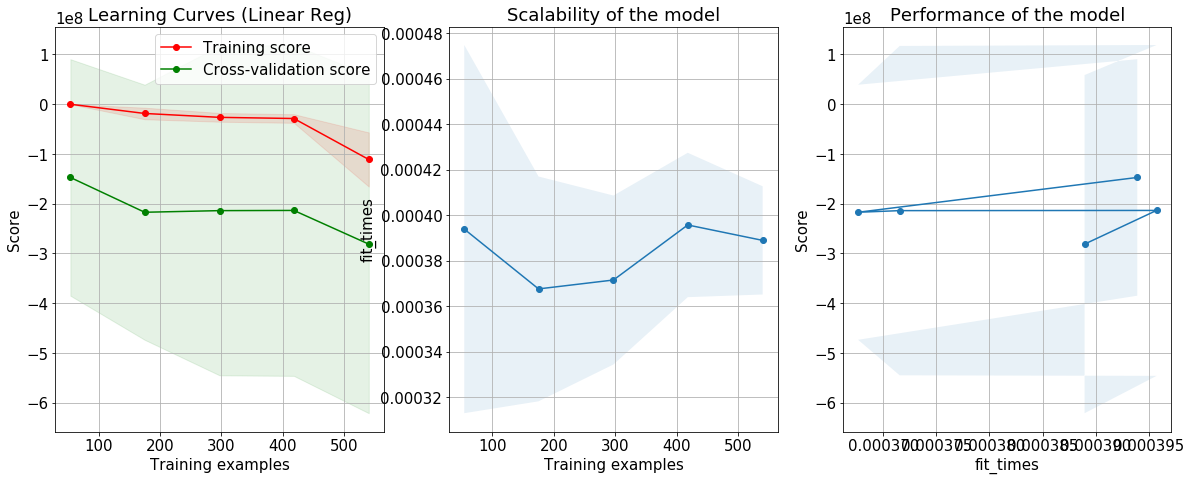

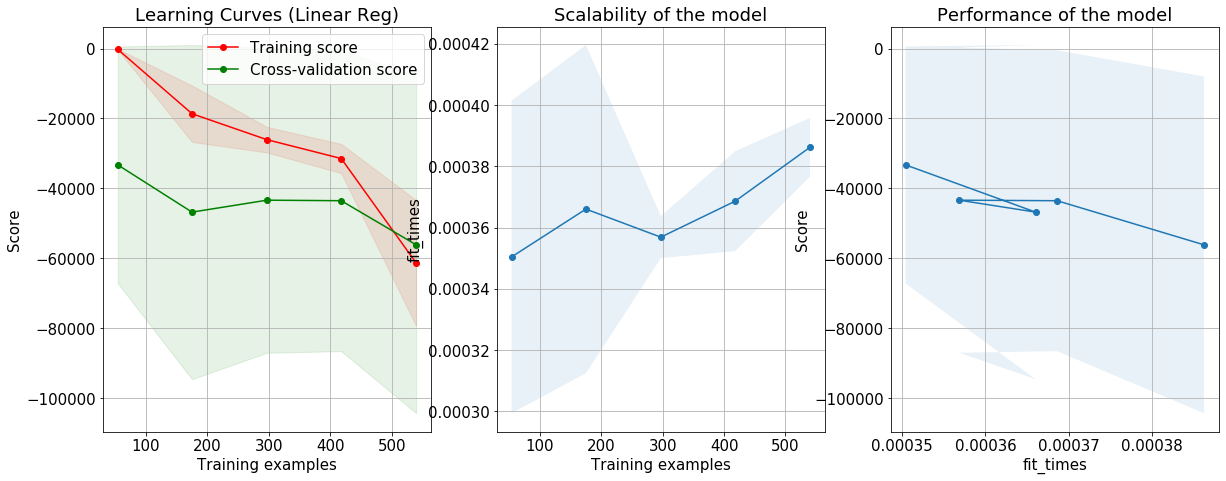

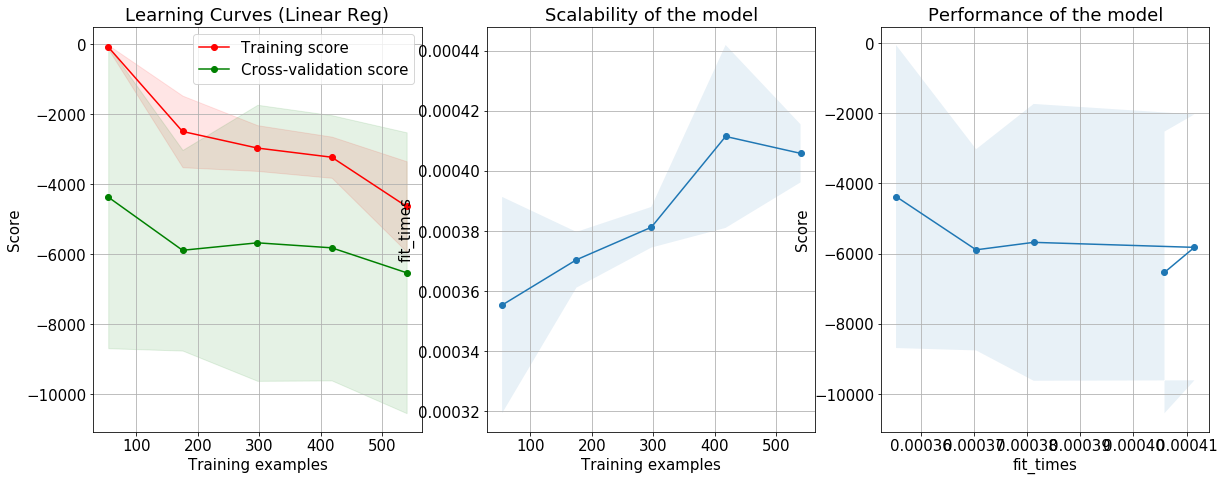

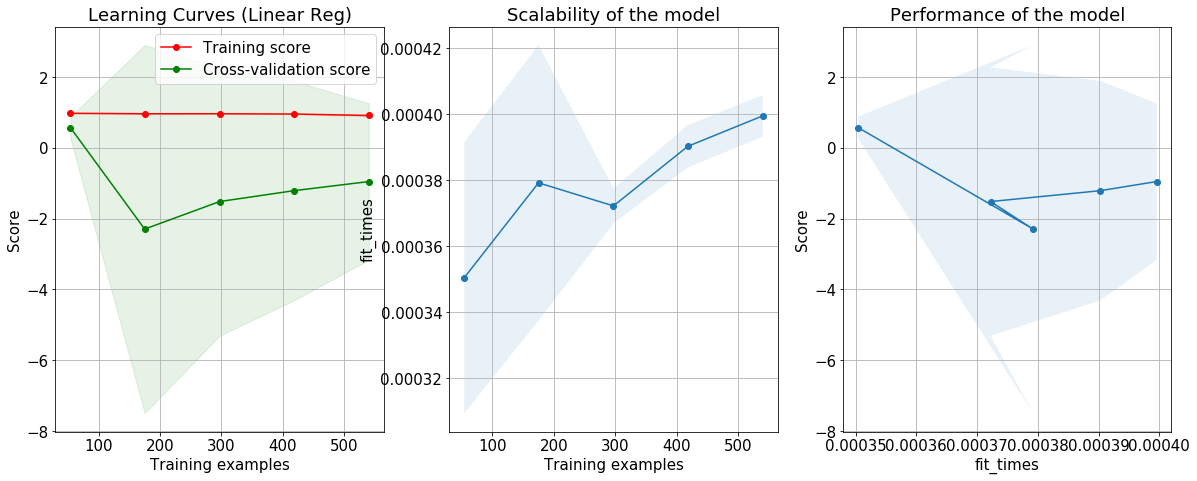

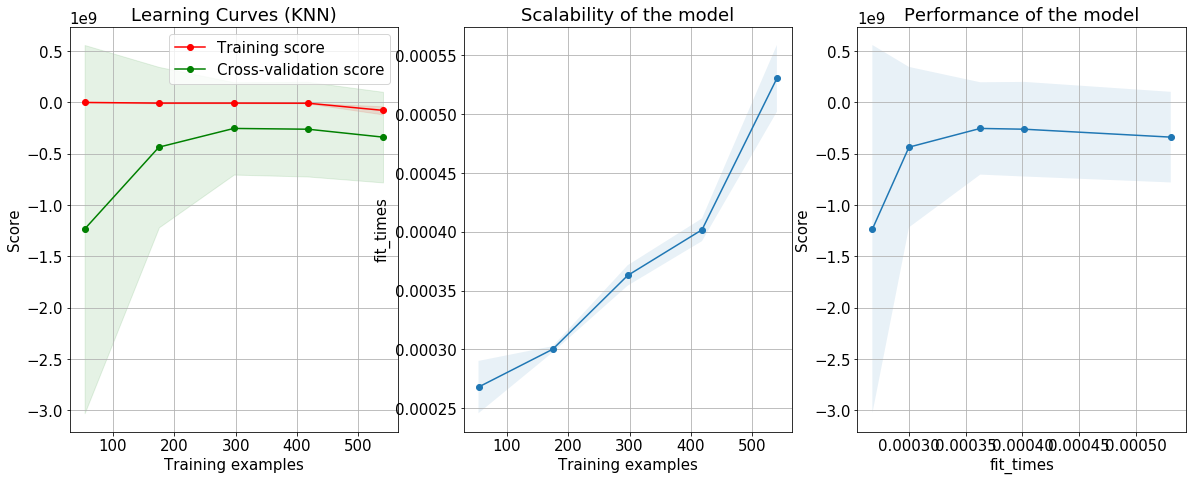

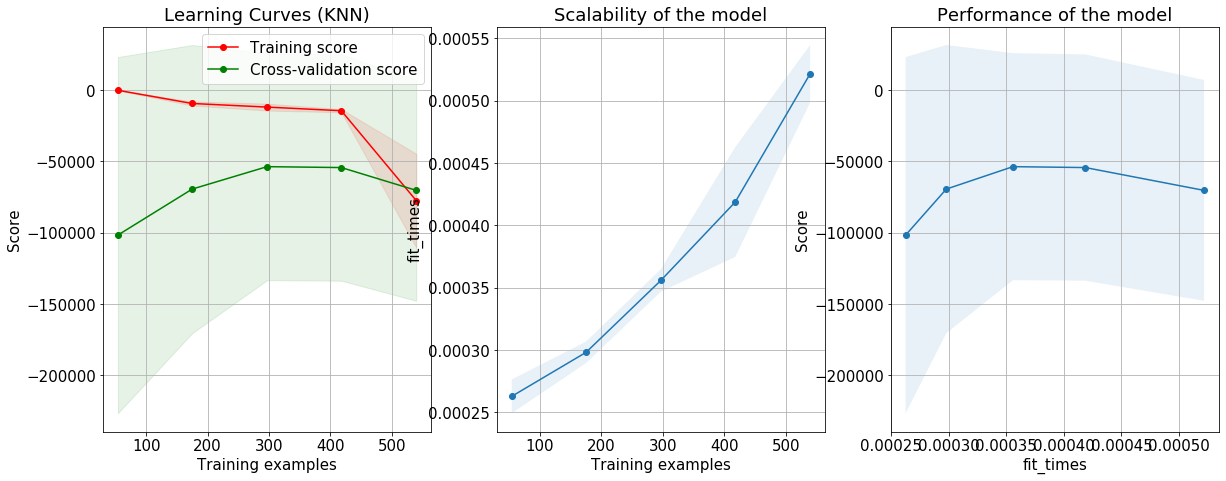

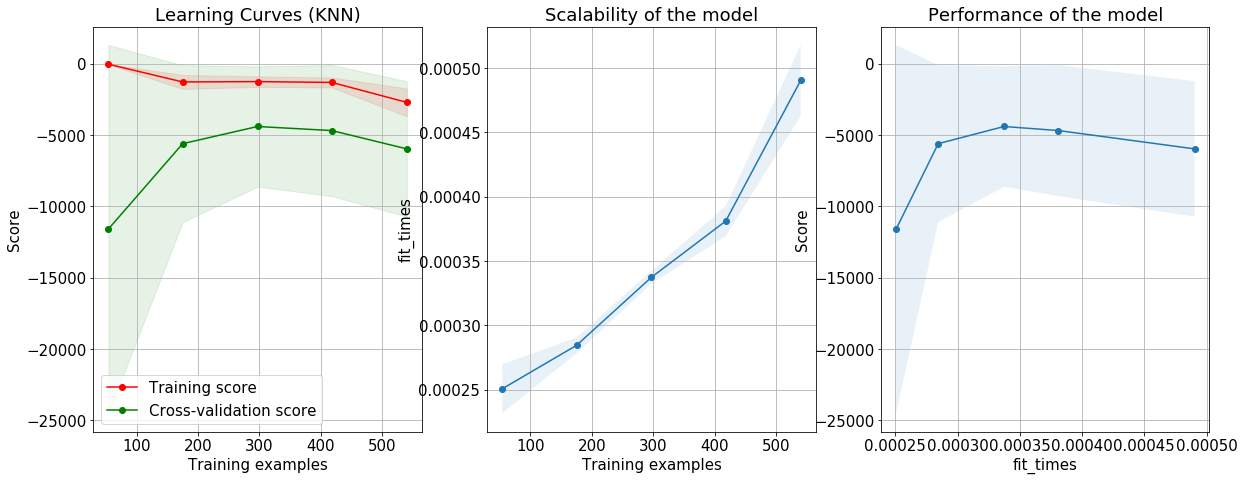

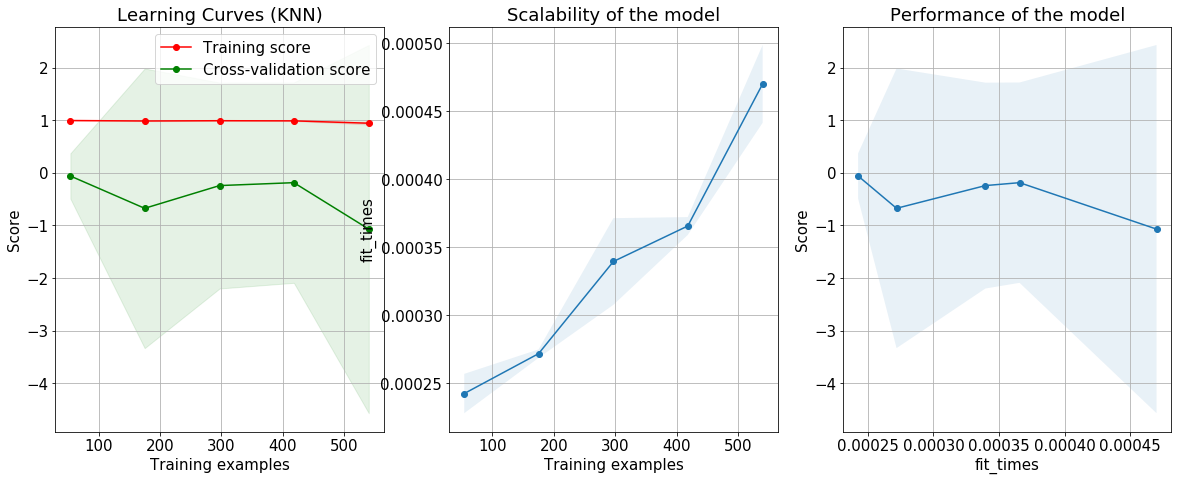

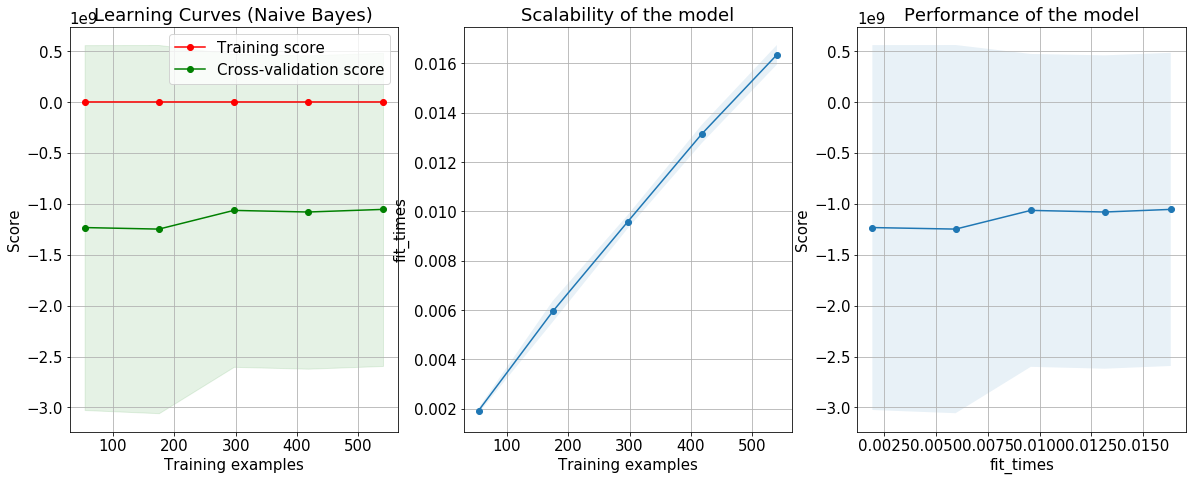

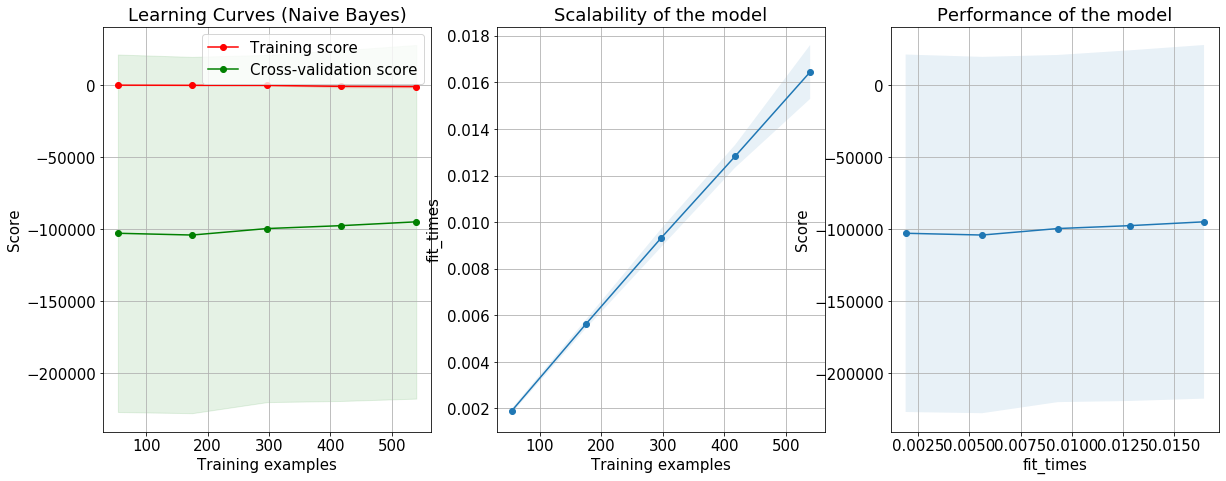

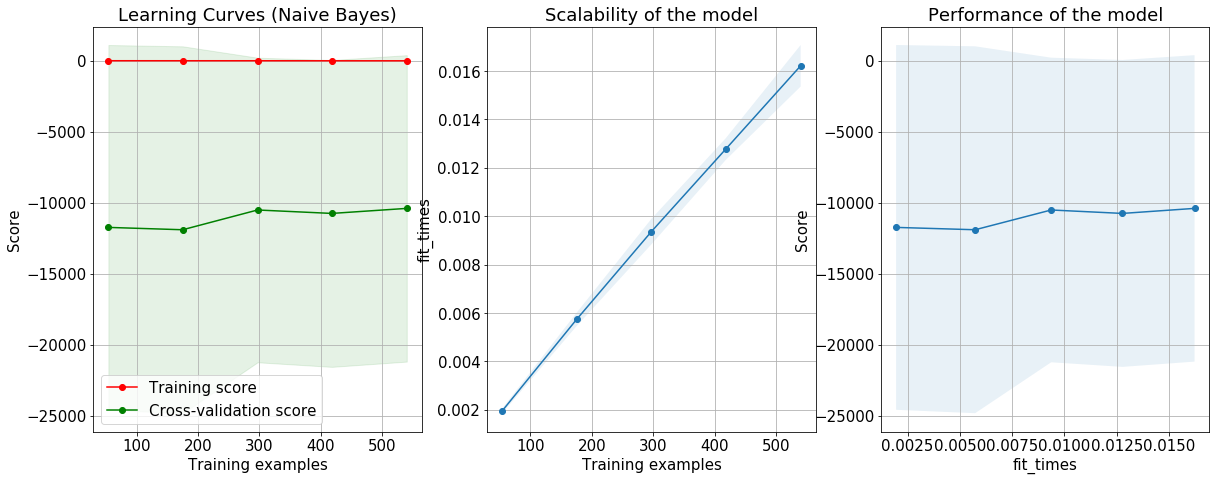

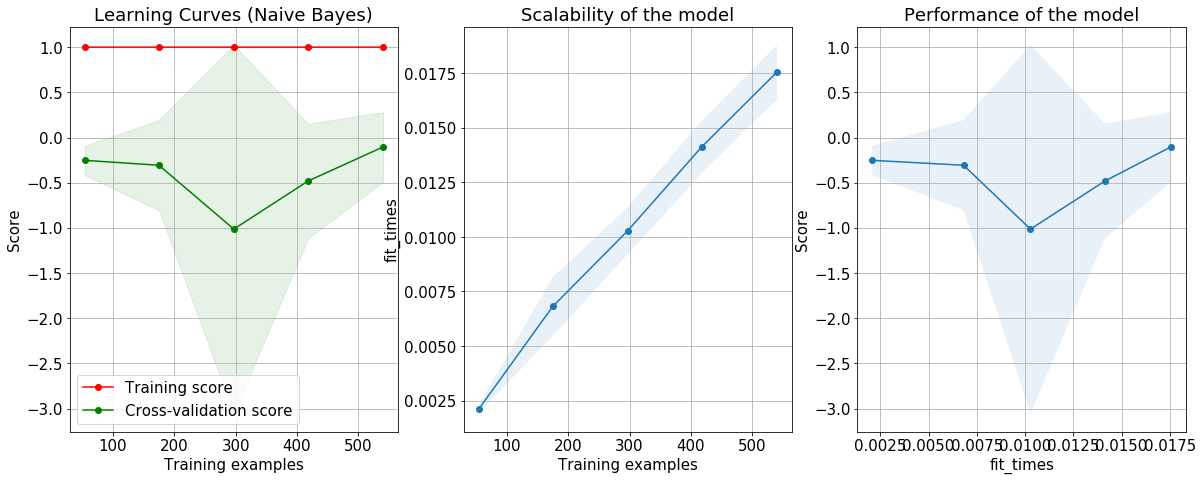

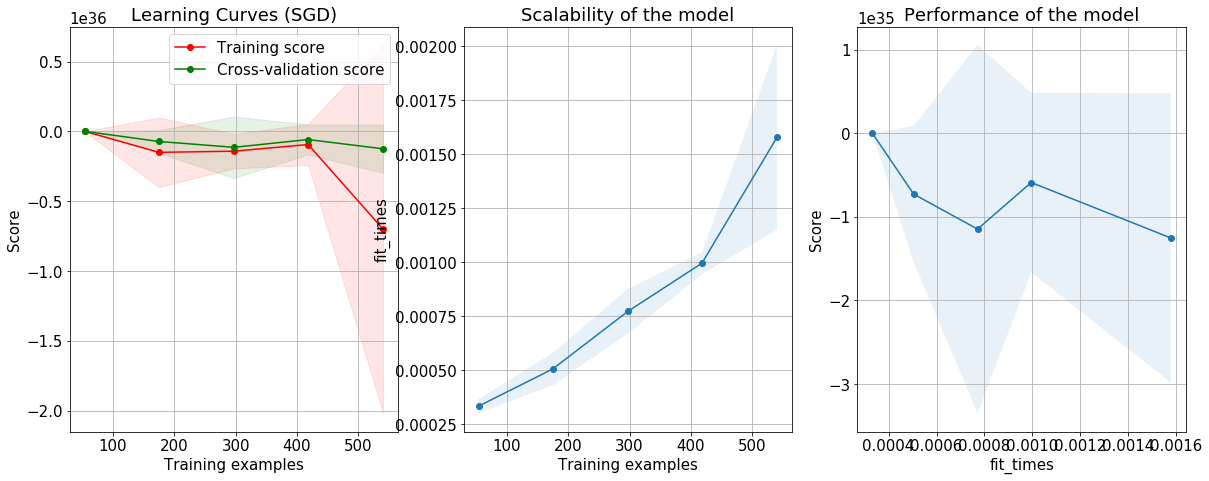

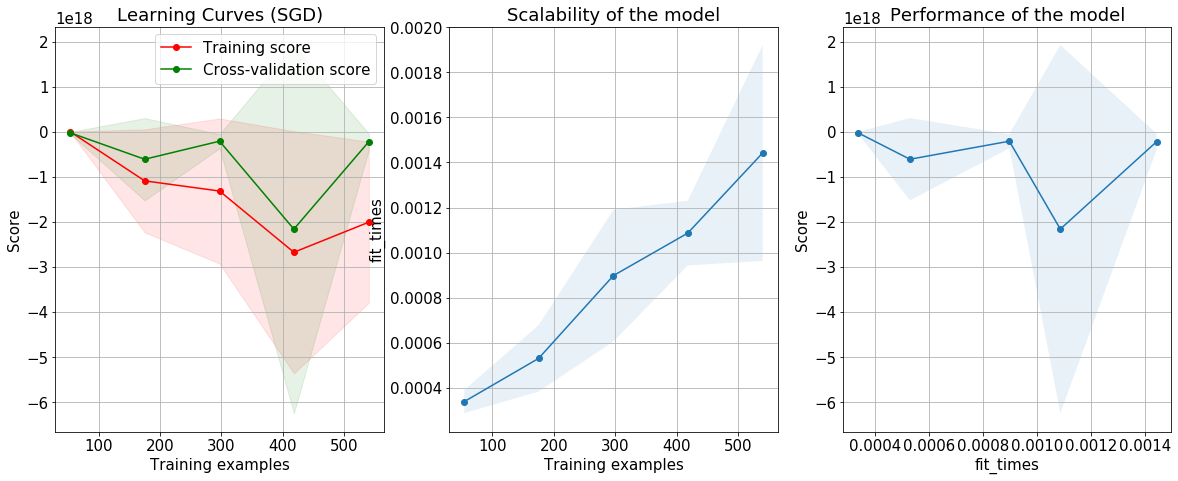

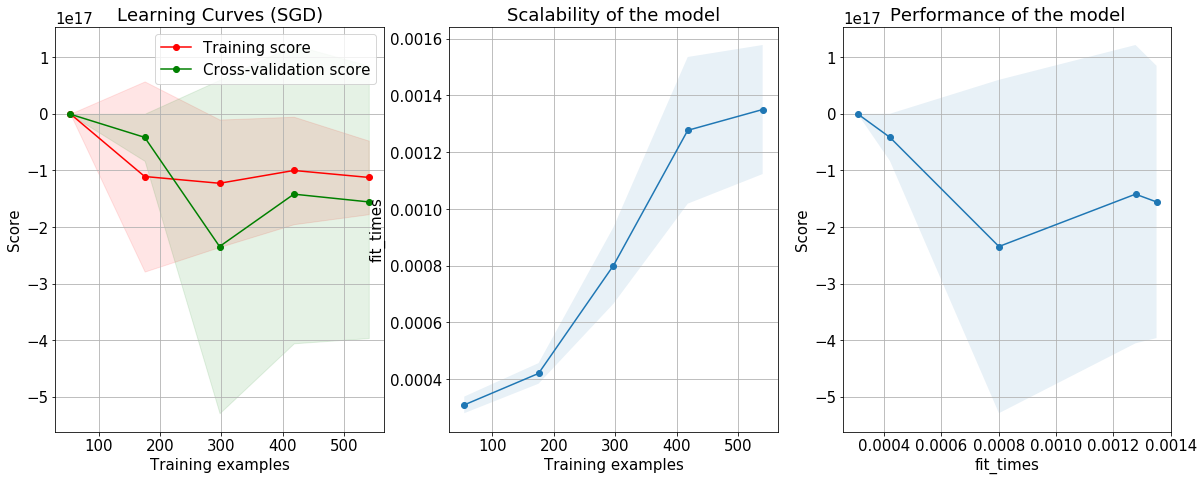

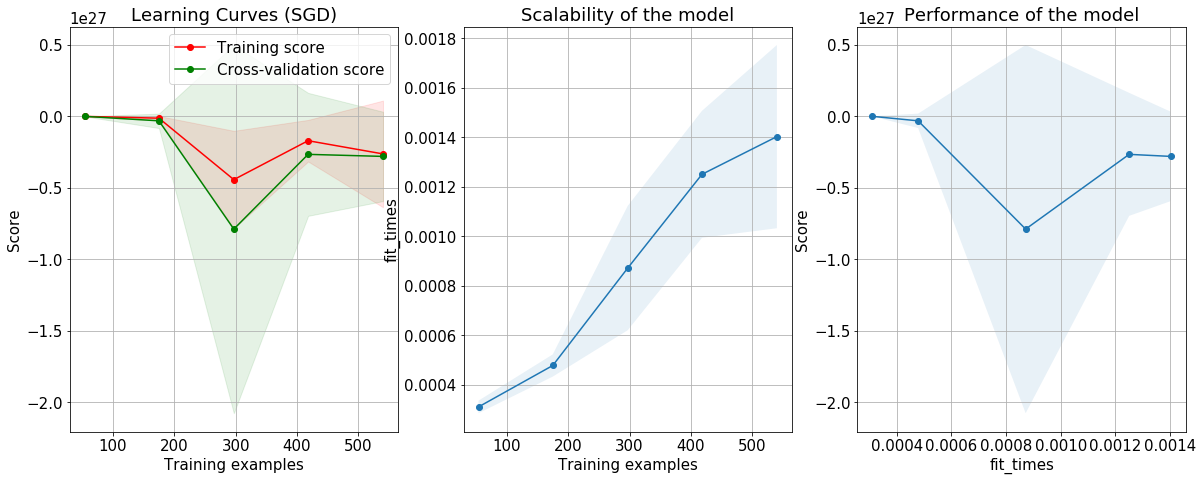

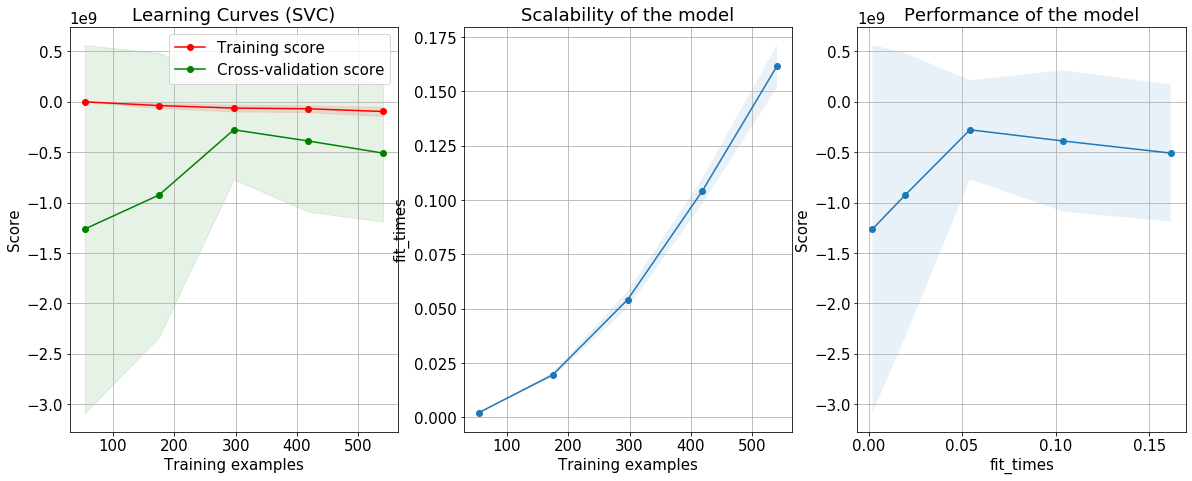

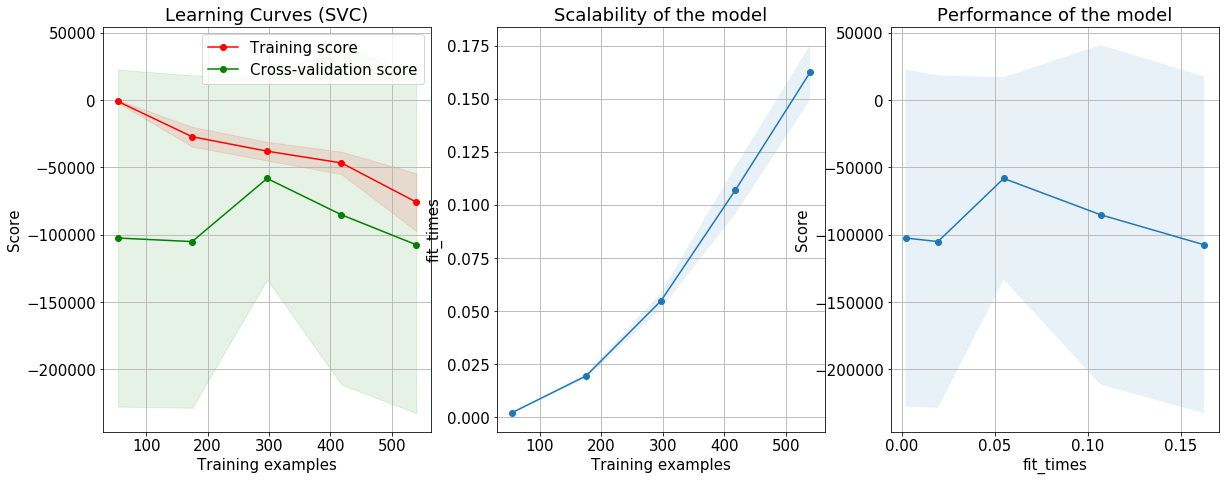

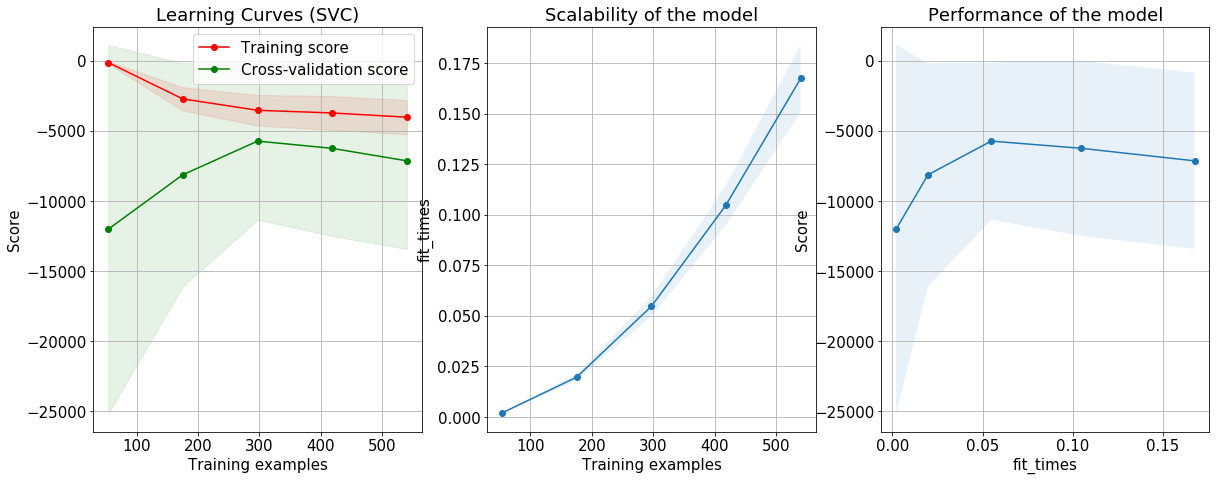

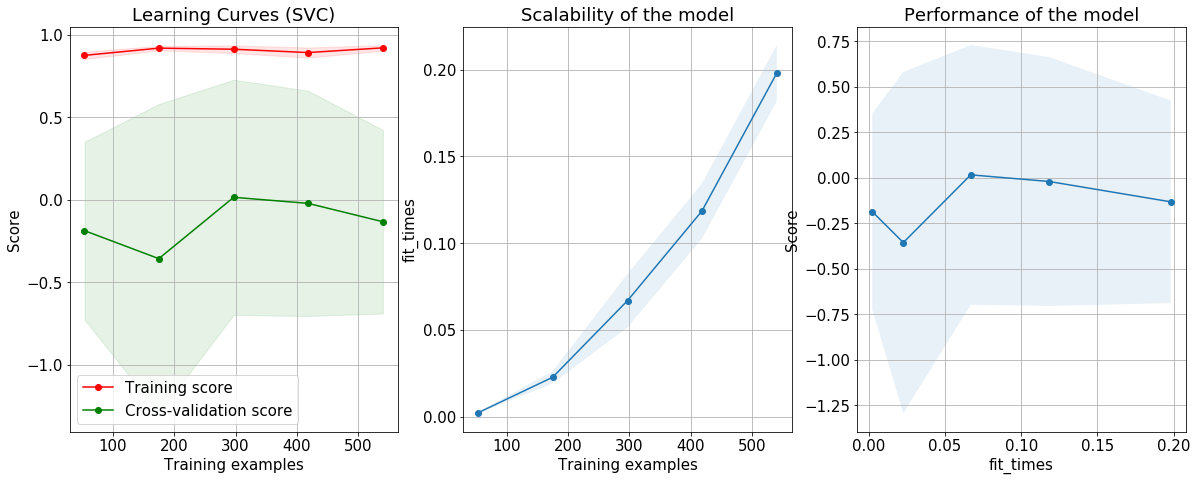

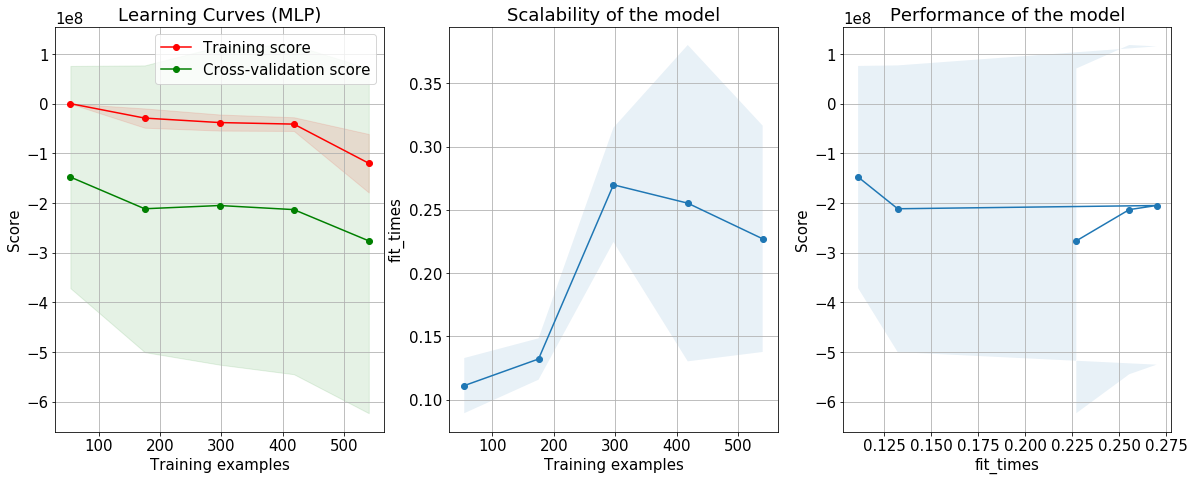

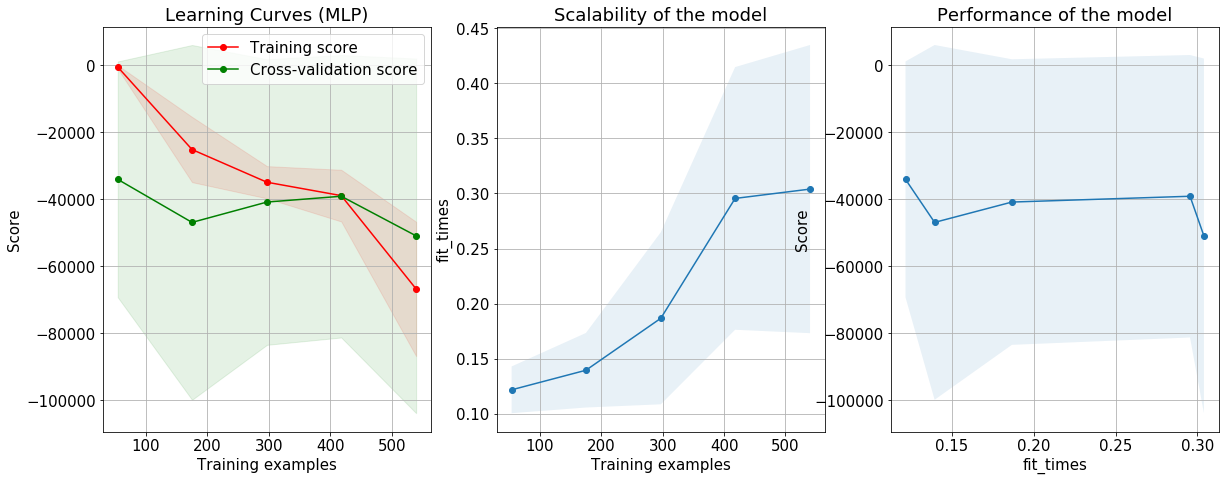

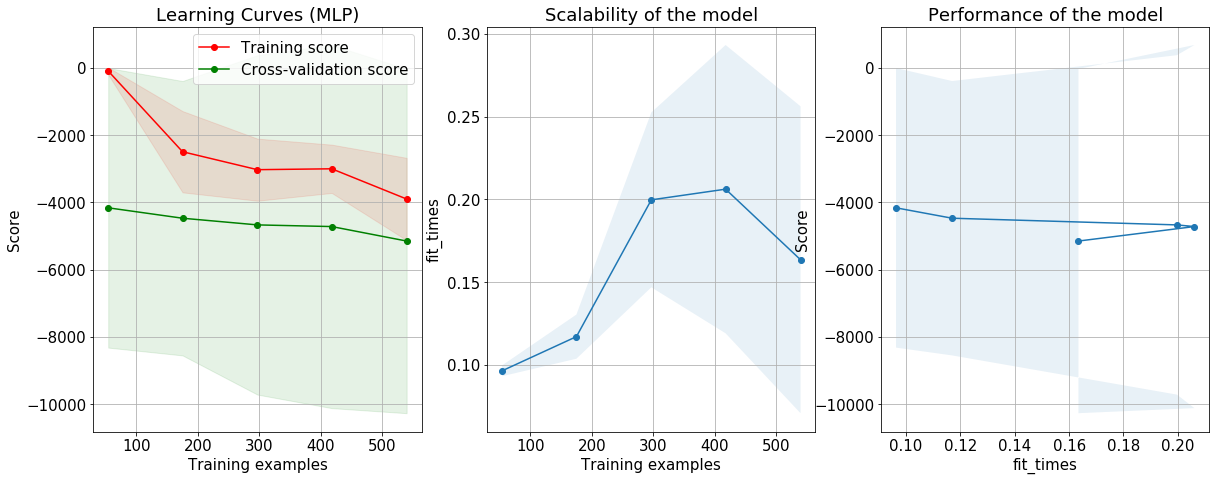

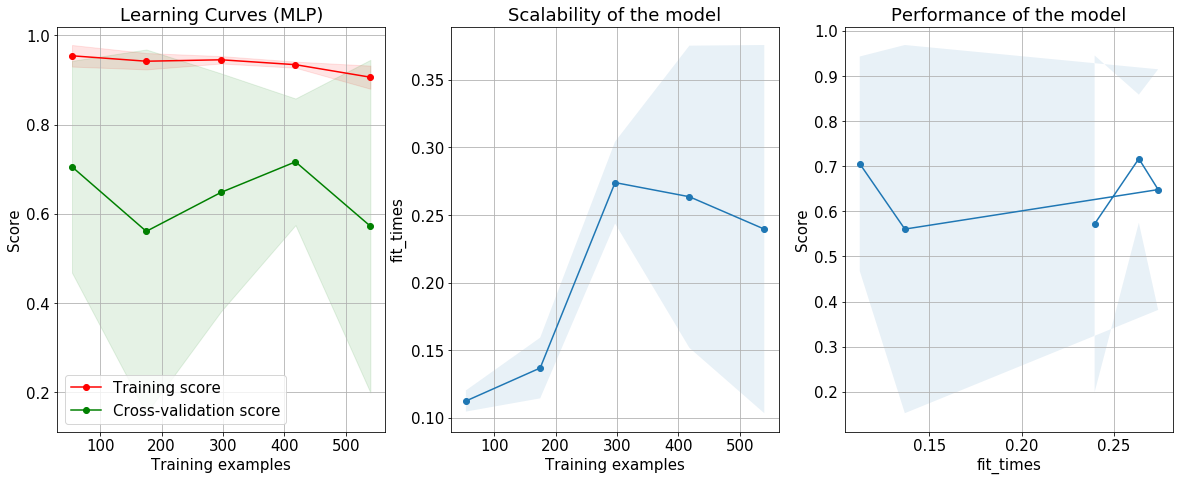

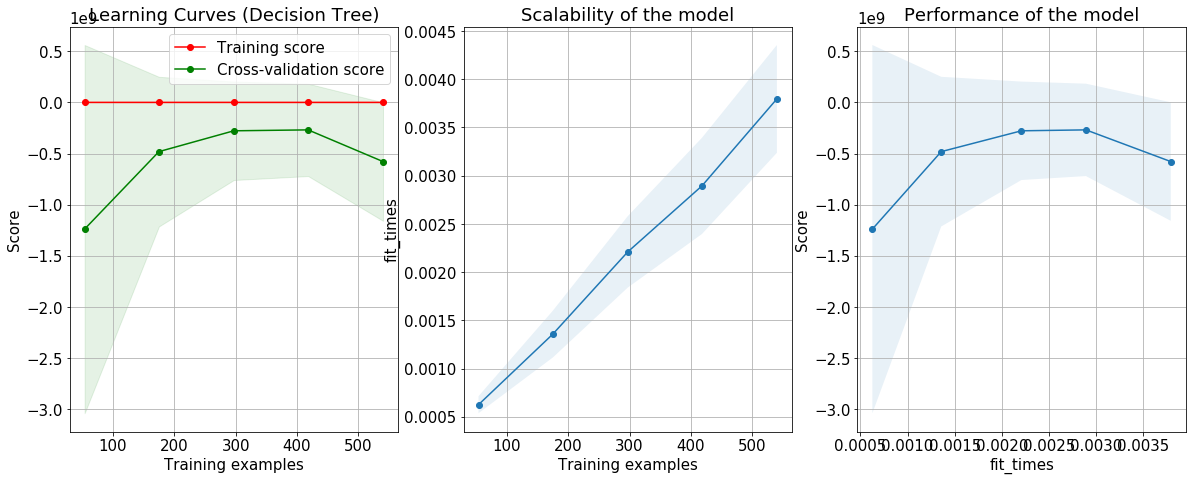

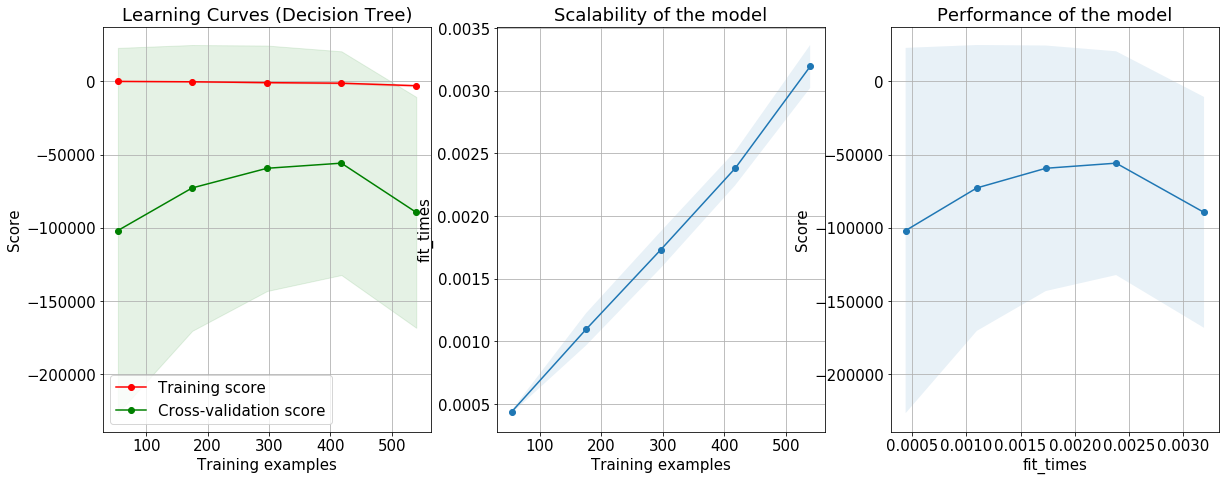

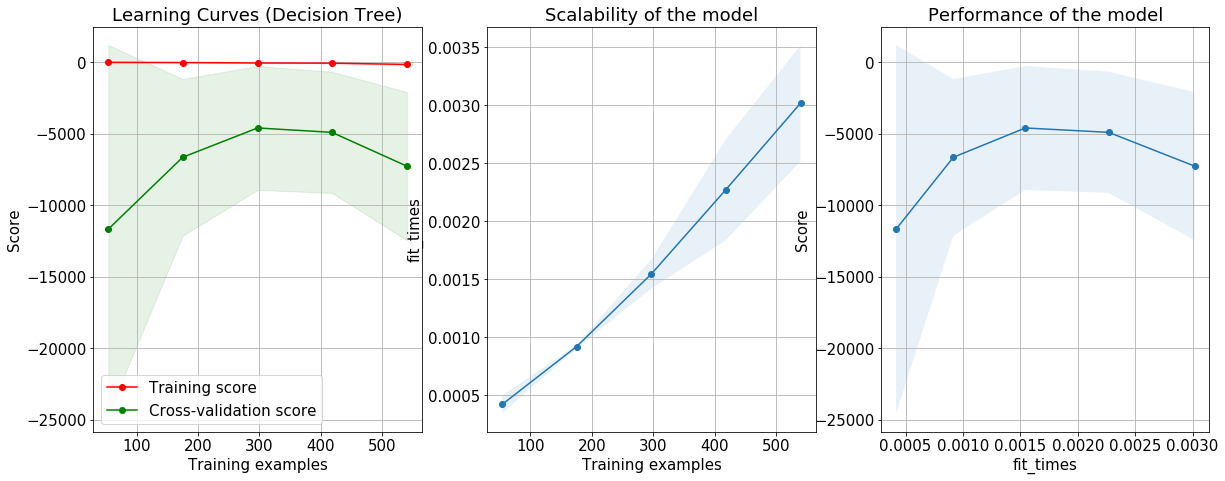

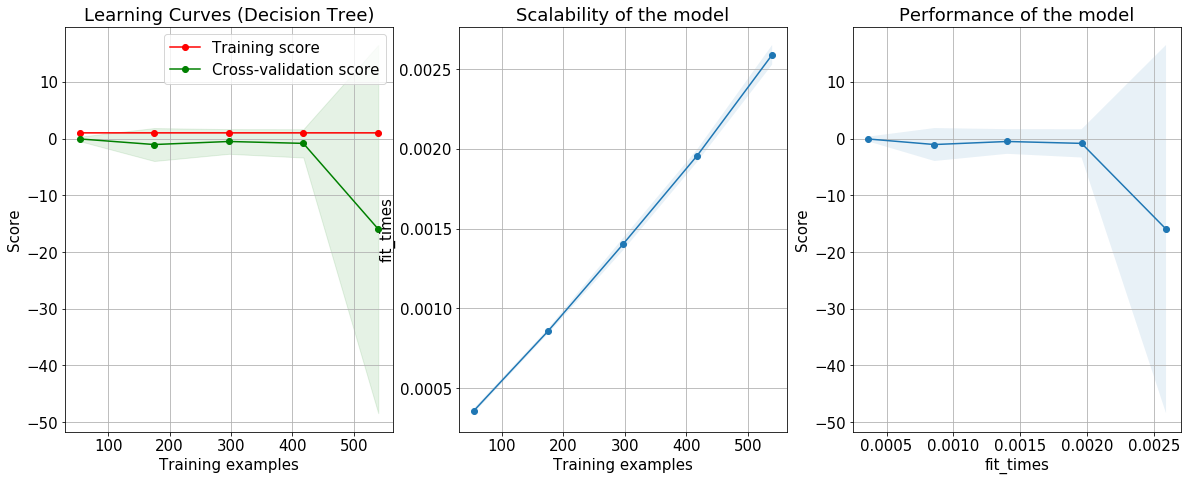

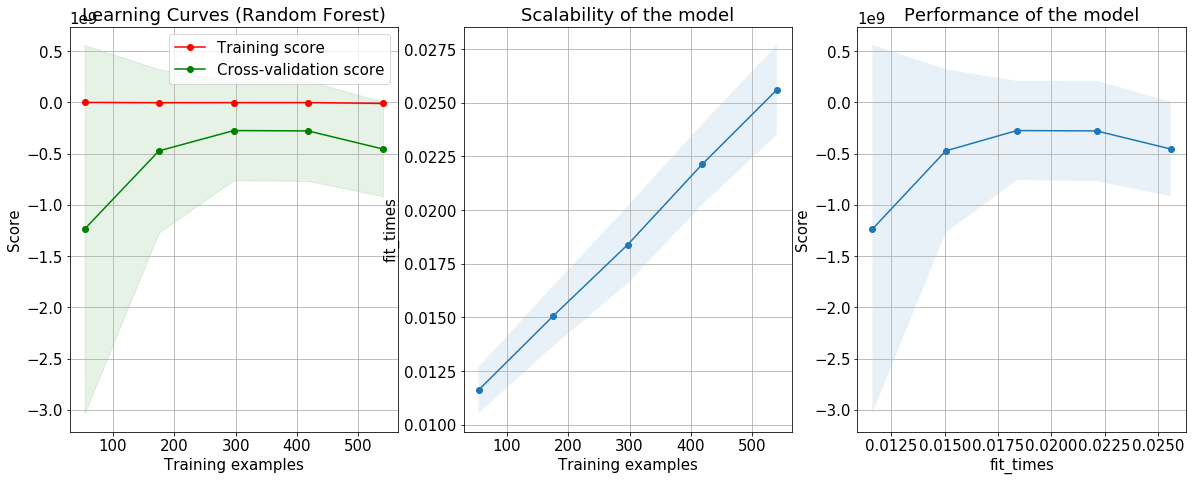

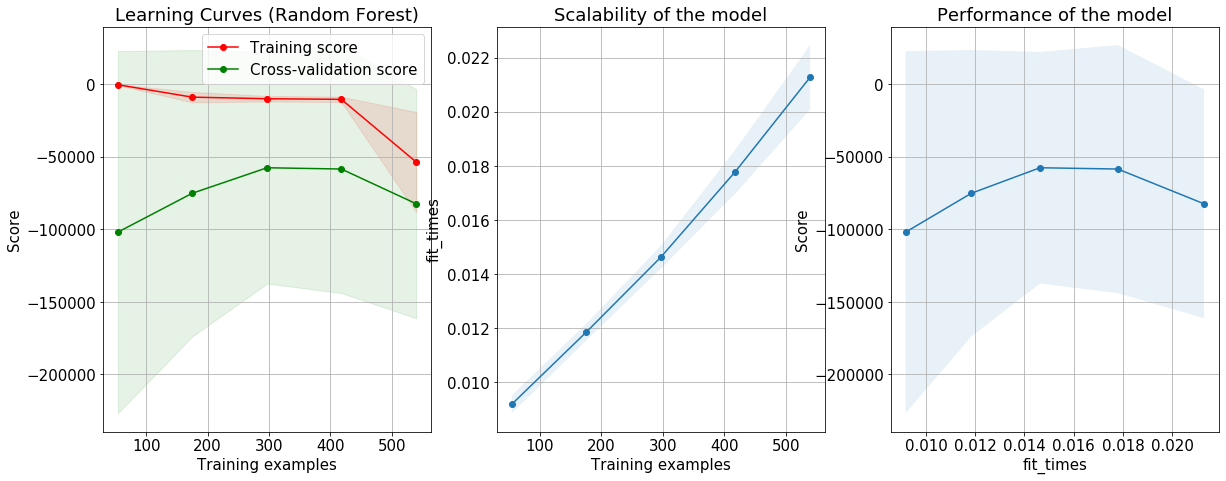

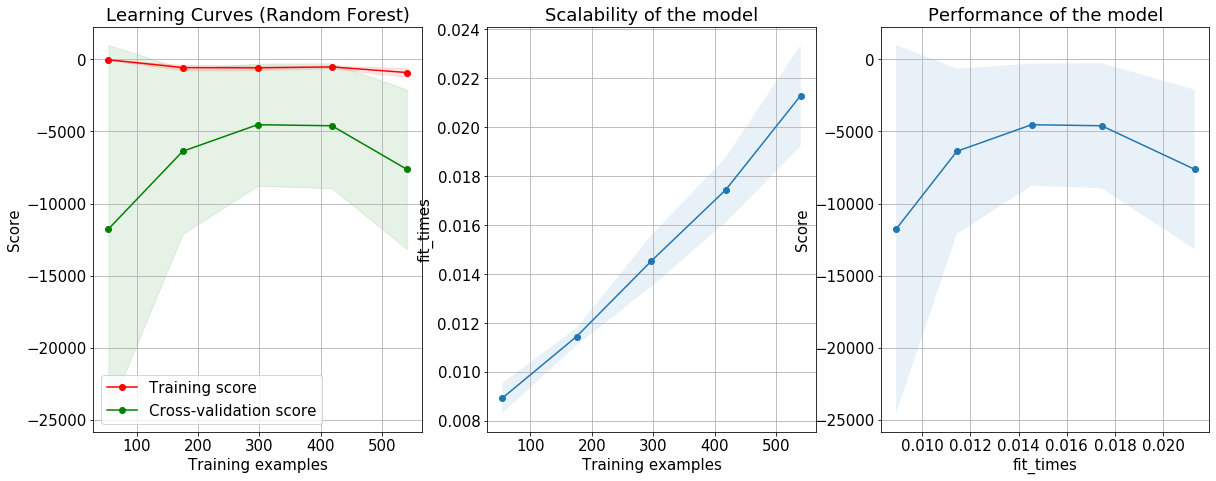

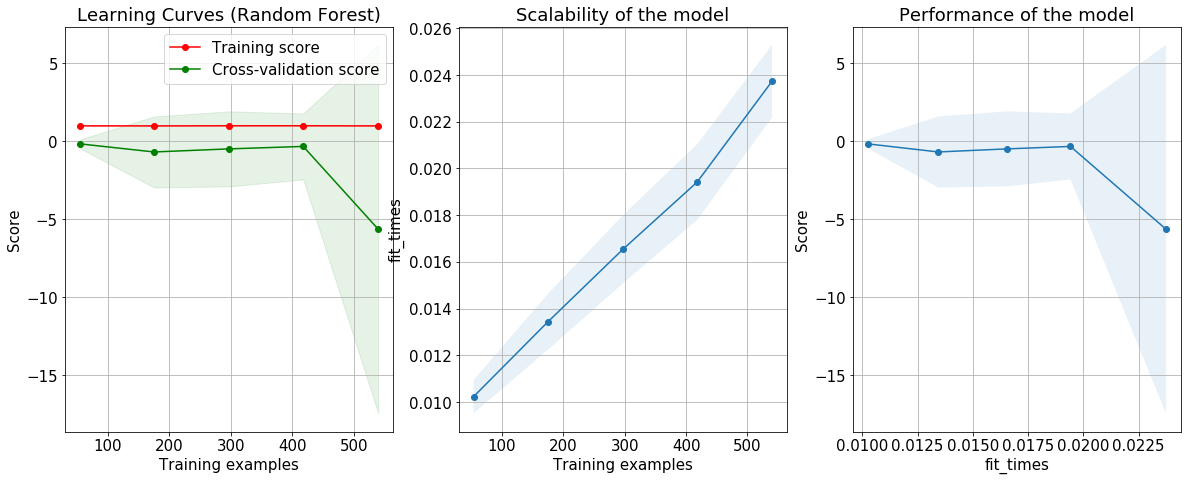

In [32]:
import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(models)):
    for metric in metrics:
        plot_learning_curve(estimator=models[i],
                    title=titles[i],
                    X=all_features_2,
                    y=all_labels_2,
                    groups=all_groups_2,
                    cv=group_kfold,
                    scoring=metric)

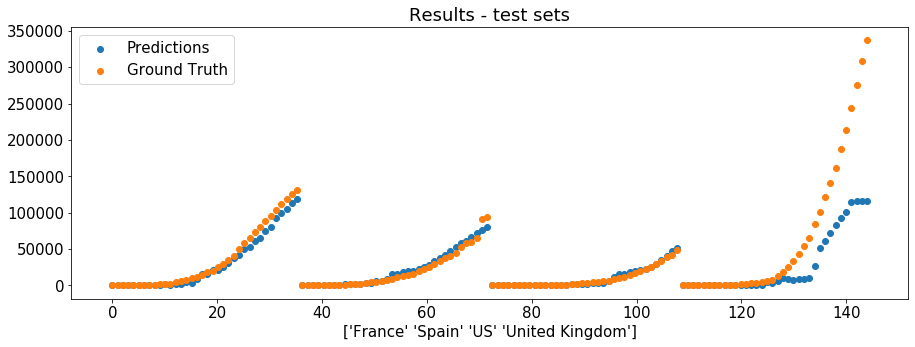

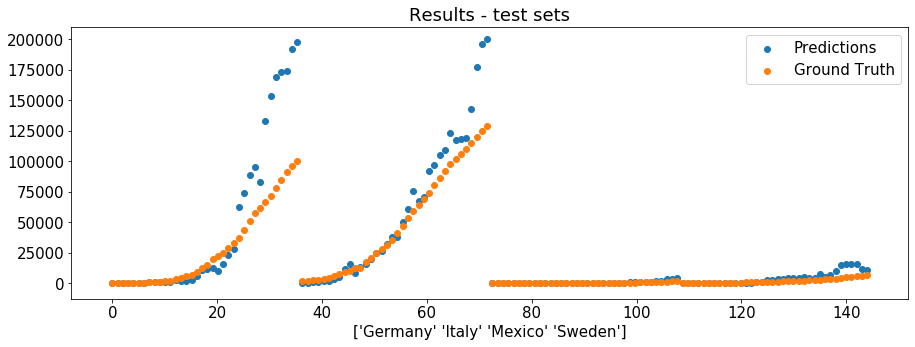

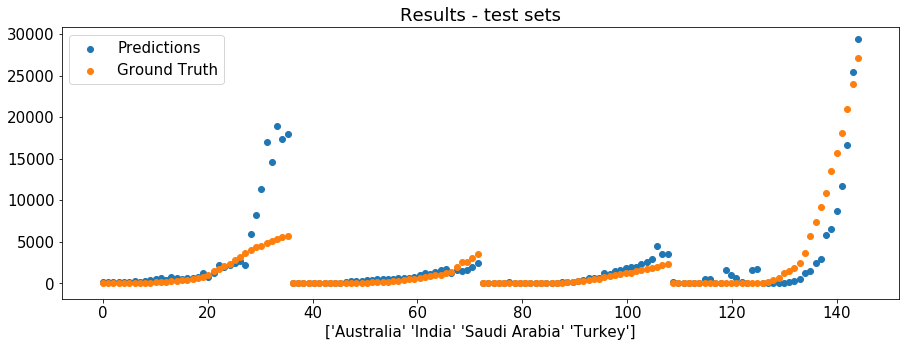

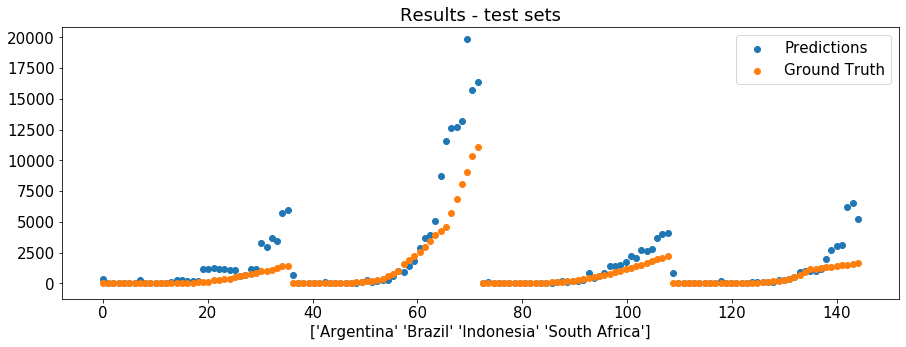

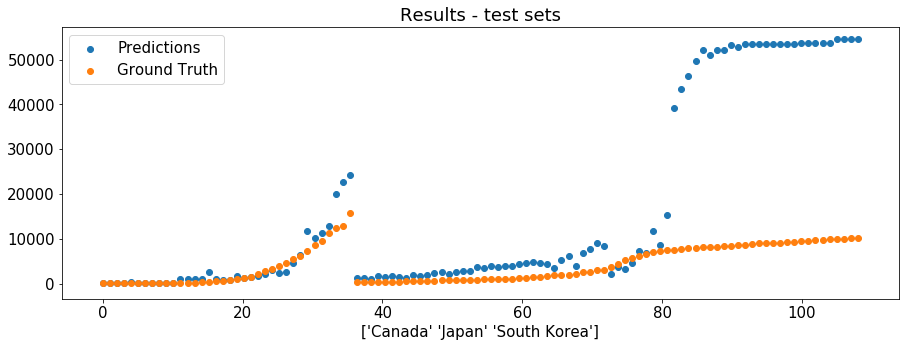

In [33]:
train_r2scores=[]
test_r2scores=[]
train_mse_scores=[]
test_mse_scores=[]
train_maxerror_scores=[]
test_maxerror_scores=[]
train_mae_scores=[]
test_mae_scores=[]

train_r2scores_scaled=[]
test_r2scores_scaled=[]
test_mae_scores_scaled=[]
train_mse_scores_scaled=[]
test_mse_scores_scaled=[]
train_maxerror_scores_scaled=[]
test_maxerror_scores_scaled=[]
train_mae_scores_scaled=[]

for train_idx,test_idx in group_kfold.split(all_features_2,all_labels_2,all_groups_2):
    #Train set
    train_countries=np.unique(np.array(second_data.loc[train_idx]["country"]))
    X_train=all_features_2[train_idx]
    y_train=all_labels_2[train_idx]
    
    #Test & Validation set
    test_countries=np.unique(np.array(second_data.loc[test_idx]["country"]))
    X_test=all_features_2[test_idx]
    y_test=all_labels_2[test_idx]

    #Scaling the data - only not scale the number of cases in the previous day
    scaler=StandardScaler()    
    X_train[:,1:7]=scaler.fit_transform(X_train[:,1:7])
    X_test[:,1:7]=scaler.transform(X_test[:,1:7])
    
    model=RandomForestRegressor()
    #model=tree.DecisionTreeRegressor(max_depth=10)
    #model=MLPRegressor(hidden_layer_sizes=(100,),learning_rate='adaptive',max_iter=500)
    model.fit(X_train,y_train)
    
    predictions_train=model.predict(X_train)
    predictions_test=model.predict(X_test)
    
    #Scale the predicted and label values to [0,1] range
    scaler_l=MinMaxScaler()
    #y
    y_train_scaled=y_train.reshape(-1,1)
    y_train_scaled=scaler_l.fit_transform(y_train_scaled)
    y_train_scaled=y_train_scaled.reshape(-1)
    
    y_test_scaled=y_test.reshape(-1,1)
    y_test_scaled=scaler_l.fit_transform(y_test_scaled)
    y_test_scaled=y_test_scaled.reshape(-1)
    #pred
    predictions_train_scaled=predictions_train.reshape(-1,1)
    predictions_train_scaled=scaler_l.fit_transform(predictions_train_scaled)
    predictions_train_scaled=predictions_train_scaled.reshape(-1)       
    
    predictions_test_scaled=predictions_test.reshape(-1,1)
    predictions_test_scaled=scaler_l.fit_transform(predictions_test_scaled)
    predictions_test_scaled=predictions_test_scaled.reshape(-1)
      
        
    #Calculate values of metrics
    #Non-scaled
    r2_train=r2_score(y_train,predictions_train)
    r2_test=r2_score(y_test,predictions_test)
    
    mse_train=mse(y_train,predictions_train)
    mse_test=mse(y_test,predictions_test)
    
    me_train=max_error(y_train,predictions_train)
    me_test=max_error(y_test,predictions_test)
    
    mae_train=mean_absolute_error(y_train,predictions_train)
    mae_test=mean_absolute_error(y_test,predictions_test)    
    
    #Scaled
    r2_train_scaled=r2_score(y_train_scaled,predictions_train_scaled)
    r2_test_scaled=r2_score(y_test_scaled,predictions_test_scaled)
    
    mse_train_scaled=mse(y_train_scaled,predictions_train_scaled)
    mse_test_scaled=mse(y_test_scaled,predictions_test_scaled)
    
    me_train_scaled=max_error(y_train_scaled,predictions_train_scaled)
    me_test_scaled=max_error(y_test_scaled,predictions_test_scaled)
    
    mae_train_scaled=mean_absolute_error(y_train_scaled,predictions_train_scaled)
    mae_test_scaled=mean_absolute_error(y_test_scaled,predictions_test_scaled)  
    
    
    #Save results
    #Non-scaled
    train_r2scores.append(round(r2_train,4))
    test_r2scores.append(round(r2_test,4))
    
    train_mse_scores.append(round(mse_train,4))
    test_mse_scores.append(round(mse_test,4))
    
    train_maxerror_scores.append(round(me_train,4))
    test_maxerror_scores.append(round(me_test,4))
    
    train_mae_scores.append(round(mae_train,4))
    test_mae_scores.append(round(mae_test,4))
    
    #Scaled
    train_r2scores_scaled.append(round(r2_train_scaled,4))
    test_r2scores_scaled.append(round(r2_test_scaled,4))
    
    train_mse_scores_scaled.append(round(mse_train_scaled,4))
    test_mse_scores_scaled.append(round(mse_test_scaled,4))
    
    train_maxerror_scores_scaled.append(round(me_train_scaled,4))
    test_maxerror_scores_scaled.append(round(me_test_scaled,4))
    
    train_mae_scores_scaled.append(round(mae_train_scaled,4))
    test_mae_scores_scaled.append(round(mae_test_scaled,4))
            
    fig=plt.figure(figsize=(15,5))
    x=np.linspace(0,len(predictions_test),len(predictions_test))
    plt.scatter(x,predictions_test,label="Predictions")
    plt.scatter(x,y_test,label="Ground Truth")
    plt.xlabel(str(test_countries))
    plt.legend()
    plt.title("Results - test sets")
    plt.show()
    
    
results_train=pd.DataFrame(list(zip(train_r2scores,train_r2scores_scaled,train_mse_scores,train_mse_scores_scaled,train_maxerror_scores,train_maxerror_scores_scaled,train_mae_scores,train_mae_scores_scaled)),
                          columns=["R2","R2_s","MSE","MSE_s","ME","ME_s","MAE","MAE_s"])

results_test=pd.DataFrame(list(zip(test_r2scores,test_r2scores_scaled,test_mse_scores,test_mse_scores_scaled,test_maxerror_scores,test_maxerror_scores_scaled,test_mae_scores,test_mae_scores_scaled)),
                          columns=["R2","R2_s","MSE","MSE_s","ME","ME_s","MAE","MAE_s"])




### Results train

In [34]:
results_train

R2    R2_s           MSE   MSE_s        ME    ME_s        MAE   MAE_s
0  0.9988  0.9973  4.576976e+05  0.0001   5092.56  0.0470   304.7335  0.0034
1  0.9880  0.9657  1.387290e+07  0.0003  62937.66  0.1656   888.9699  0.0063
2  0.9916  0.9789  1.201661e+07  0.0003  43389.00  0.1673  1050.6169  0.0066
3  0.9936  0.9872  9.140436e+06  0.0002  32122.26  0.1344   997.0115  0.0051
4  0.9944  0.9871  7.622126e+06  0.0002  38797.63  0.1013   869.9663  0.0049

In [35]:
results_train.describe()

R2      R2_s           MSE     MSE_s            ME      ME_s  \
count  5.000000  5.000000  5.000000e+00  5.000000      5.000000  5.000000   
mean   0.993280  0.983240  8.621953e+06  0.000220  36467.822000  0.123120   
std    0.003954  0.011777  5.172515e+06  0.000084  20959.926101  0.050384   
min    0.988000  0.965700  4.576976e+05  0.000100   5092.560000  0.047000   
25%    0.991600  0.978900  7.622126e+06  0.000200  32122.260000  0.101300   
50%    0.993600  0.987100  9.140436e+06  0.000200  38797.630000  0.134400   
75%    0.994400  0.987200  1.201661e+07  0.000300  43389.000000  0.165600   
max    0.998800  0.997300  1.387290e+07  0.000300  62937.660000  0.167300   

              MAE     MAE_s  
count     5.00000  5.000000  
mean    822.25962  0.005260  
std     298.84977  0.001274  
min     304.73350  0.003400  
25%     869.96630  0.004900  
50%     888.96990  0.005100  
75%     997.01150  0.006300  
max    1050.61690  0.006600

### Results test

In [36]:
results_test

R2    R2_s           MSE   MSE_s         ME    ME_s         MAE  \
0   0.6470  0.0474  1.253948e+09  0.0298  220760.70  0.6093  12484.1318   
1   0.5353  0.9169  5.277509e+08  0.0057   97602.56  0.2611   9392.9548   
2   0.5812  0.6293  7.639336e+06  0.0092   13647.63  0.4497   1180.9638   
3  -0.0228  0.9010  3.484071e+06  0.0027   10781.93  0.1863    818.9003   
4 -28.1113  0.1241  4.734220e+08  0.0577   44959.18  0.5543  12235.1240   

    MAE_s  
0  0.1023  
1  0.0407  
2  0.0408  
3  0.0281  
4  0.1638

In [37]:
results_test.describe()

R2     R2_s           MSE    MSE_s             ME      ME_s  \
count   5.000000  5.00000  5.000000e+00  5.00000       5.000000  5.000000   
mean   -5.274120  0.52374  4.532488e+08  0.02102   77550.400000  0.412140   
std    12.769171  0.41673  5.118428e+08  0.02309   87342.800745  0.183241   
min   -28.111300  0.04740  3.484071e+06  0.00270   10781.930000  0.186300   
25%    -0.022800  0.12410  7.639336e+06  0.00570   13647.630000  0.261100   
50%     0.535300  0.62930  4.734220e+08  0.00920   44959.180000  0.449700   
75%     0.581200  0.90100  5.277509e+08  0.02980   97602.560000  0.554300   
max     0.647000  0.91690  1.253948e+09  0.05770  220760.700000  0.609300   

               MAE     MAE_s  
count      5.00000  5.000000  
mean    7222.41494  0.075140  
std     5810.08372  0.057394  
min      818.90030  0.028100  
25%     1180.96380  0.040700  
50%     9392.95480  0.040800  
75%    12235.12400  0.102300  
max    12484.13180  0.163800

### Tunning of the parameters
For each split, we will compute the best parameters; they are very alike.

In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.5s finished


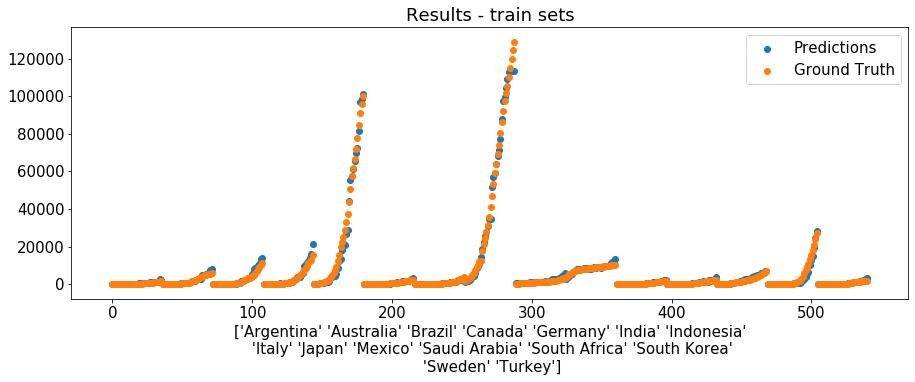

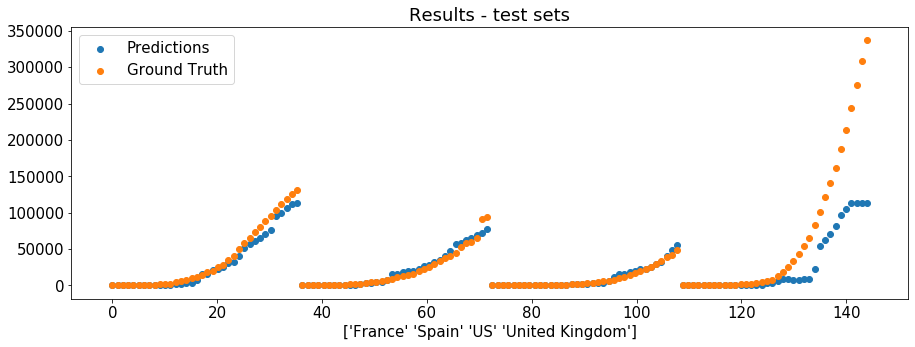

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.6s finished


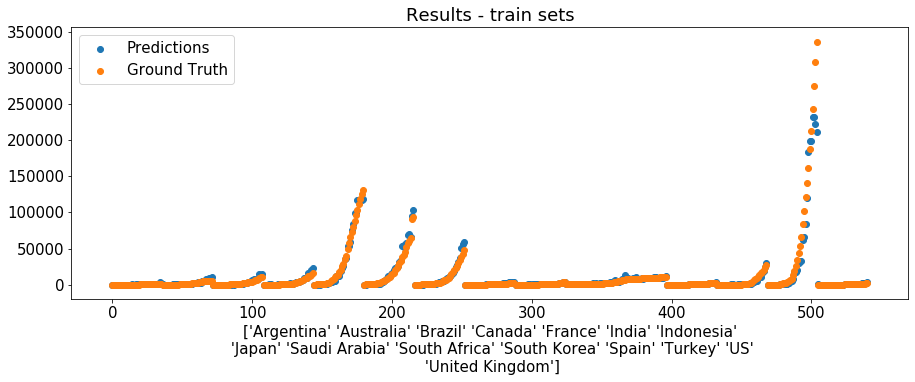

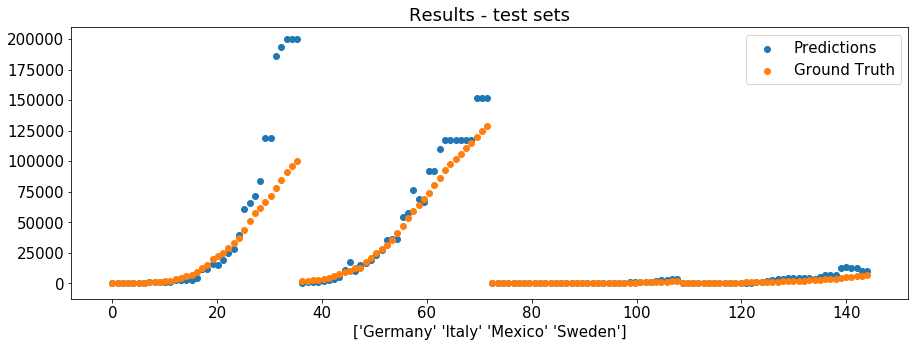

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   17.0s finished


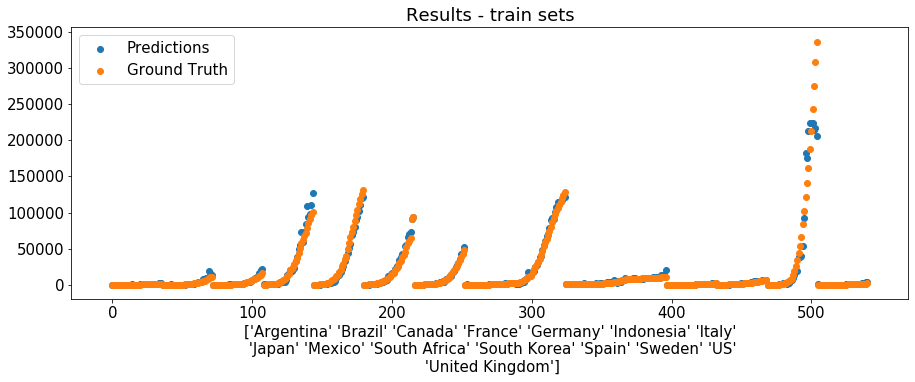

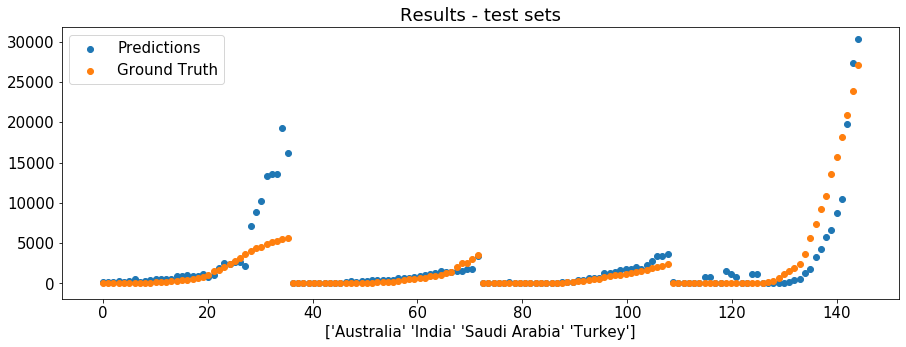

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   17.0s finished


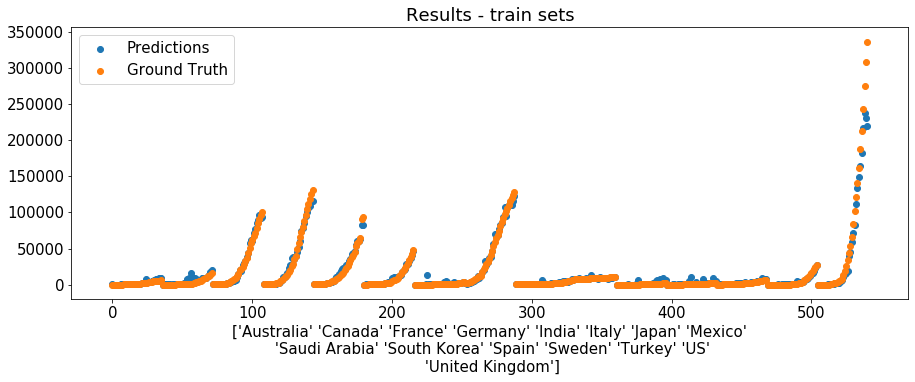

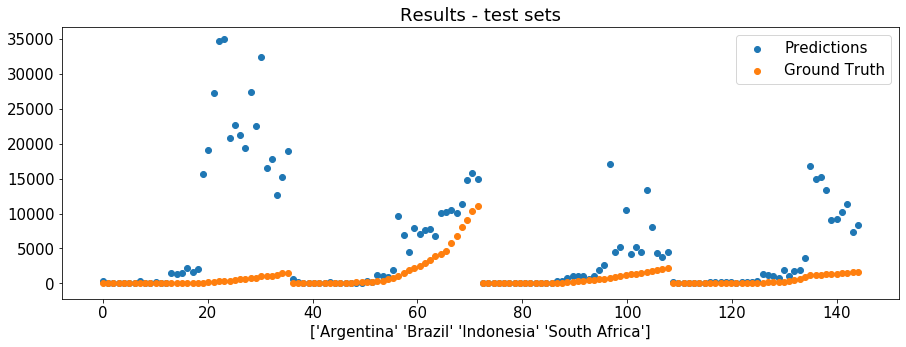

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.0s finished


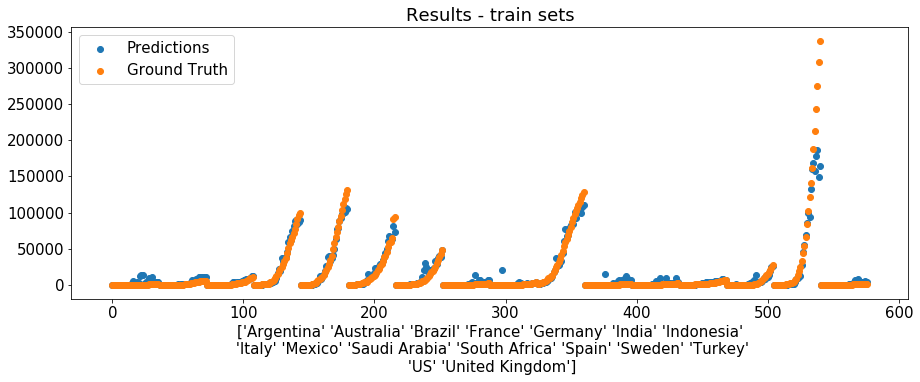

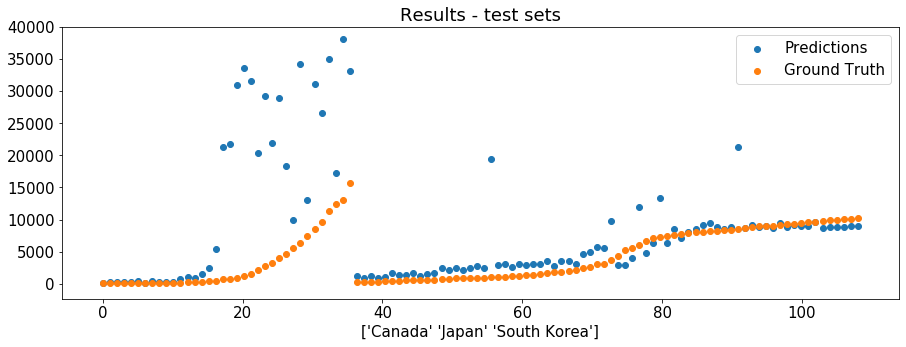

In [40]:
train_r2scores=[]
test_r2scores=[]
train_mse_scores=[]
test_mse_scores=[]
train_maxerror_scores=[]
test_maxerror_scores=[]
train_mae_scores=[]
test_mae_scores=[]

train_r2scores_scaled=[]
test_r2scores_scaled=[]
test_mae_scores_scaled=[]
train_mse_scores_scaled=[]
test_mse_scores_scaled=[]
train_maxerror_scores_scaled=[]
test_maxerror_scores_scaled=[]
train_mae_scores_scaled=[]

for train_idx,test_idx in group_kfold.split(all_features_2,all_labels_2,all_groups_2):
    #Train set
    train_countries=np.unique(np.array(second_data.loc[train_idx]["country"]))
    X_train=all_features_2[train_idx]
    y_train=all_labels_2[train_idx]
    
    #Test & Validation set
    test_countries=np.unique(np.array(second_data.loc[test_idx]["country"]))
    X_test=all_features_2[test_idx]
    y_test=all_labels_2[test_idx]

    #Scaling the data - only not scale the number of cases in the previous day
    scaler=StandardScaler()    
    X_train[:,1:7]=scaler.fit_transform(X_train[:,1:7])
    X_test[:,1:7]=scaler.transform(X_test[:,1:7])
    
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    
    model = rf_random.best_estimator_
    #model=RandomForestRegressor()
    #model=tree.DecisionTreeRegressor(max_depth=10)
    #model=MLPRegressor(hidden_layer_sizes=(100,),learning_rate='adaptive',max_iter=500)
    model.fit(X_train,y_train)
    
    predictions_train=model.predict(X_train)
    predictions_test=model.predict(X_test)
    
    #Scale the predicted and label values to [0,1] range
    scaler_l=MinMaxScaler()
    #y
    y_train_scaled=y_train.reshape(-1,1)
    y_train_scaled=scaler_l.fit_transform(y_train_scaled)
    y_train_scaled=y_train_scaled.reshape(-1)
    
    y_test_scaled=y_test.reshape(-1,1)
    y_test_scaled=scaler_l.fit_transform(y_test_scaled)
    y_test_scaled=y_test_scaled.reshape(-1)
    #pred
    predictions_train_scaled=predictions_train.reshape(-1,1)
    predictions_train_scaled=scaler_l.fit_transform(predictions_train_scaled)
    predictions_train_scaled=predictions_train_scaled.reshape(-1)       
    
    predictions_test_scaled=predictions_test.reshape(-1,1)
    predictions_test_scaled=scaler_l.fit_transform(predictions_test_scaled)
    predictions_test_scaled=predictions_test_scaled.reshape(-1)
      
        
    #Calculate values of metrics
    #Non-scaled
    r2_train=r2_score(y_train,predictions_train)
    r2_test=r2_score(y_test,predictions_test)
    
    mse_train=mse(y_train,predictions_train)
    mse_test=mse(y_test,predictions_test)
    
    me_train=max_error(y_train,predictions_train)
    me_test=max_error(y_test,predictions_test)
    
    mae_train=mean_absolute_error(y_train,predictions_train)
    mae_test=mean_absolute_error(y_test,predictions_test)    
    
    #Scaled
    r2_train_scaled=r2_score(y_train_scaled,predictions_train_scaled)
    r2_test_scaled=r2_score(y_test_scaled,predictions_test_scaled)
    
    mse_train_scaled=mse(y_train_scaled,predictions_train_scaled)
    mse_test_scaled=mse(y_test_scaled,predictions_test_scaled)
    
    me_train_scaled=max_error(y_train_scaled,predictions_train_scaled)
    me_test_scaled=max_error(y_test_scaled,predictions_test_scaled)
    
    mae_train_scaled=mean_absolute_error(y_train_scaled,predictions_train_scaled)
    mae_test_scaled=mean_absolute_error(y_test_scaled,predictions_test_scaled)  
    
    
    #Save results
    #Non-scaled
    train_r2scores.append(round(r2_train,4))
    test_r2scores.append(round(r2_test,4))
    
    train_mse_scores.append(round(mse_train,4))
    test_mse_scores.append(round(mse_test,4))
    
    train_maxerror_scores.append(round(me_train,4))
    test_maxerror_scores.append(round(me_test,4))
    
    train_mae_scores.append(round(mae_train,4))
    test_mae_scores.append(round(mae_test,4))
    
    #Scaled
    train_r2scores_scaled.append(round(r2_train_scaled,4))
    test_r2scores_scaled.append(round(r2_test_scaled,4))
    
    train_mse_scores_scaled.append(round(mse_train_scaled,4))
    test_mse_scores_scaled.append(round(mse_test_scaled,4))
    
    train_maxerror_scores_scaled.append(round(me_train_scaled,4))
    test_maxerror_scores_scaled.append(round(me_test_scaled,4))
    
    train_mae_scores_scaled.append(round(mae_train_scaled,4))
    test_mae_scores_scaled.append(round(mae_test_scaled,4))
    
    
    fig=plt.figure(figsize=(15,5))
    x=np.linspace(0,len(predictions_train),len(predictions_train))
    plt.scatter(x,predictions_train,label="Predictions")
    plt.scatter(x,y_train,label="Ground Truth")
    plt.xlabel(str(train_countries))
    plt.legend()
    plt.title("Results - train sets")
    plt.show()
    
    fig=plt.figure(figsize=(15,5))
    x=np.linspace(0,len(predictions_test),len(predictions_test))
    plt.scatter(x,predictions_test,label="Predictions")
    plt.scatter(x,y_test,label="Ground Truth")
    plt.xlabel(str(test_countries))
    plt.legend()
    plt.title("Results - test sets")
    plt.show()
    
    
results_train=pd.DataFrame(list(zip(train_r2scores,train_r2scores_scaled,train_mse_scores,train_mse_scores_scaled,train_maxerror_scores,train_maxerror_scores_scaled,train_mae_scores,train_mae_scores_scaled)),
                          columns=["R2","R2_s","MSE","MSE_s","ME","ME_s","MAE","MAE_s"])

results_test=pd.DataFrame(list(zip(test_r2scores,test_r2scores_scaled,test_mse_scores,test_mse_scores_scaled,test_maxerror_scores,test_maxerror_scores_scaled,test_mae_scores,test_mae_scores_scaled)),
                          columns=["R2","R2_s","MSE","MSE_s","ME","ME_s","MAE","MAE_s"])



### Results train

In [41]:
results_train

R2    R2_s           MSE   MSE_s           ME    ME_s        MAE  \
0  0.9938  0.9777  2.357858e+06  0.0005   15432.8228  0.1468   622.1452   
1  0.9453  0.8534  6.345053e+07  0.0015  125265.7886  0.3102  1846.1789   
2  0.9409  0.6963  8.486467e+07  0.0038  130667.6672  0.4693  2318.6752   
3  0.9634  0.8859  5.251217e+07  0.0014  117240.6090  0.1908  2120.2855   
4  0.8948  0.5966  1.440725e+08  0.0049  172865.7890  0.3769  3235.4750   

    MAE_s  
0  0.0088  
1  0.0133  
2  0.0238  
3  0.0189  
4  0.0342

In [42]:
results_train.describe()

R2      R2_s           MSE     MSE_s             ME      ME_s  \
count  5.000000  5.000000  5.000000e+00  5.000000       5.000000  5.000000   
mean   0.947640  0.801980  6.945154e+07  0.002420  112294.535320  0.298800   
std    0.036132  0.153226  5.155183e+07  0.001846   58269.539976  0.132352   
min    0.894800  0.596600  2.357858e+06  0.000500   15432.822800  0.146800   
25%    0.940900  0.696300  5.251217e+07  0.001400  117240.609000  0.190800   
50%    0.945300  0.853400  6.345053e+07  0.001500  125265.788600  0.310200   
75%    0.963400  0.885900  8.486467e+07  0.003800  130667.667200  0.376900   
max    0.993800  0.977700  1.440725e+08  0.004900  172865.789000  0.469300   

               MAE     MAE_s  
count     5.000000  5.000000  
mean   2028.551960  0.019800  
std     943.462992  0.009841  
min     622.145200  0.008800  
25%    1846.178900  0.013300  
50%    2120.285500  0.018900  
75%    2318.675200  0.023800  
max    3235.475000  0.034200

### Results test

In [43]:
results_test

R2    R2_s           MSE   MSE_s           ME    ME_s         MAE  \
0   0.6396 -0.0708  1.280312e+09  0.0335  224249.0655  0.6136  12691.8598   
1   0.5839  0.8841  4.725254e+08  0.0079  109008.2029  0.3292   7803.3541   
2   0.6663  0.7168  6.085995e+06  0.0071   13754.1655  0.4325   1089.9746   
3 -21.1629 -1.0878  7.549743e+07  0.0574   34502.5303  0.9667   4511.4419   
4  -4.6026 -0.0591  9.111241e+07  0.0697   32390.5215  0.8043   4825.7716   

    MAE_s  
0  0.1080  
1  0.0463  
2  0.0363  
3  0.1180  
4  0.1778

In [44]:
results_test.describe()

R2      R2_s           MSE     MSE_s             ME      ME_s  \
count   5.000000  5.000000  5.000000e+00  5.000000       5.000000  5.000000   
mean   -4.775140  0.076640  3.851066e+08  0.035120   82780.897140  0.629260   
std     9.437113  0.783882  5.326774e+08  0.028376   87085.869361  0.261486   
min   -21.162900 -1.087800  6.085995e+06  0.007100   13754.165500  0.329200   
25%    -4.602600 -0.070800  7.549743e+07  0.007900   32390.521500  0.432500   
50%     0.583900 -0.059100  9.111241e+07  0.033500   34502.530300  0.613600   
75%     0.639600  0.716800  4.725254e+08  0.057400  109008.202900  0.804300   
max     0.666300  0.884100  1.280312e+09  0.069700  224249.065500  0.966700   

               MAE     MAE_s  
count      5.00000  5.000000  
mean    6184.48040  0.097280  
std     4346.43174  0.057761  
min     1089.97460  0.036300  
25%     4511.44190  0.046300  
50%     4825.77160  0.108000  
75%     7803.35410  0.118000  
max    12691.85980  0.177800

We can observe (either in problem one and two) that models have difficulty to generalize to generalize for countries with high number of total_cases, like the United States. In the next problems, we will use other informations, such as cases divided by total population, and also add more temporal context to the features, to help the model get an larger overview of the problem.